# **Project Name:**    

#$\color{RED}{\text{ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS}}$

PROJECT TYPE- **UNSUPERVISED ML**


> CONTRIBUTION- TEAM


1.   **NEHA JADHAV**
2.   **AKANKSHA JADHAV**

# **PROJECT SUMMARY-**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India

# **GITHUB LINK:** 

# **Problem Statement**

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

**Attribute Information**

**Zomato Restaurant names and Metadata**

Use this dataset for clustering part
1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part.
1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **LET'S BEGIN!**

##**IMPORTING AND LOADING THE DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/Capstone project-04/Zomato Restaurant names and Metadata.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Capstone project-04/Zomato Restaurant reviews.csv')

In [4]:
#Creating copy of both the datasets
df_name=data1.copy()
df_review=data2.copy()

In [7]:
#Getting the first 10 rows of dataset
df_name.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."


In [8]:
#checking the last 10 rows of the dataset
df_name.tail(10)

,Name,Links,Cost,Collections,Cuisines,Timings
95,Desi Bytes,https://www.zomato.com/hyderabad/desi-bytes-ga...,400,NaN,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed"
96,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun)
97,Zega - Sheraton Hyderabad Hotel,https://www.zomato.com/hyderabad/zega-sheraton...,"1,750",NaN,"Asian, Sushi",12Noon to 2AM (Mon-Sun)
98,Triptify,https://www.zomato.com/hyderabad/triptify-gach...,400,NaN,North Indian,11 AM to 11 PM
99,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [9]:
#checking the information of the dataset
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
#Shape of the dataset
df_name.shape

(105, 6)

We have 105 observations and 6 columns

In [11]:
#Checking the description
df_name.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


##**Checking null values and removing them.**

In [13]:
#Checking for null values
df_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

There are null values present in our dataset.

In [14]:
#calculating null value percent
na_percent={}
for col in list(df_name.columns):
  x= ((df_name[col].isnull().sum())/(len(df_name[col]))*100)
  na_percent[col] = x
print(na_percent)

{'Name': 0.0, 'Links': 0.0, 'Cost': 0.0, 'Collections': 51.42857142857142, 'Cuisines': 0.0, 'Timings': 0.9523809523809524}


In [15]:
# Dropping the 'Collections' feature
df_name.drop(columns = 'Collections',axis =1,inplace = True)

In [16]:
#fill null values for timing col

df_name.fillna(value = 0, axis = 0,inplace = True)

##**Check for Datatypes for each column**

In [17]:
#Checking the info of the dataset 
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


All columns are of object datatype.

In [18]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [19]:
#checking first 5 hotel Names
df_name['Name'][:5]

0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [20]:
#Checking type of the column Name
type(df_name['Name'])

pandas.core.series.Series

In [21]:
df_name['Name'] = df_name['Name'].apply(lambda x:str(x))

In [25]:
df_name['Name'][:5]


0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [23]:
#check for Links
df_name['Links'][:5]

0    https://www.zomato.com/hyderabad/beyond-flavou...
1    https://www.zomato.com/hyderabad/paradise-gach...
2    https://www.zomato.com/hyderabad/flechazo-gach...
3    https://www.zomato.com/hyderabad/shah-ghouse-h...
4    https://www.zomato.com/hyderabad/over-the-moon...
Name: Links, dtype: object

In [26]:
type(df_name['Links'][0])

str

In [27]:
# Applying 'Cost' feature
type(df_name['Cost'][0])

str

In [28]:
df_name['Cost'][0:5]

0      800
1      800
2    1,300
3      800
4    1,200
Name: Cost, dtype: object

In [29]:
# 'Cost' feature
# Replacing ',' 
df_name['Cost'] = df_name['Cost'].str.replace(',','')

# Converting 'cost' feature to integer datatype
df_name['Cost'] = df_name['Cost'].apply(lambda x:int(x))

In [30]:
#check for Cuisines
print(df_name['Cuisines'][:5])
print(type(df_name['Cuisines'][0]))

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object
<class 'str'>


In [31]:
def get_cuisines(x):
  return x.split(', ')

In [32]:
#check for Cuisines
df_name['Cuisines'] = df_name['Cuisines'].apply(lambda x : get_cuisines(x))

In [33]:
df_name['Cuisines'].nunique

<bound method IndexOpsMixin.nunique of 0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object>

In [34]:
type(df_name['Cuisines'][0])

list

In [35]:
#check for Timings
print(df_name['Timings'][:5])
print(type(df_name['Timings'][0]))

0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                                       11 AM to 11 PM
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3                                      12 Noon to 2 AM
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...
Name: Timings, dtype: object
<class 'str'>


##**Top 10 Costly restaurants**

In [43]:
top_10_costly_rest=df_name[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

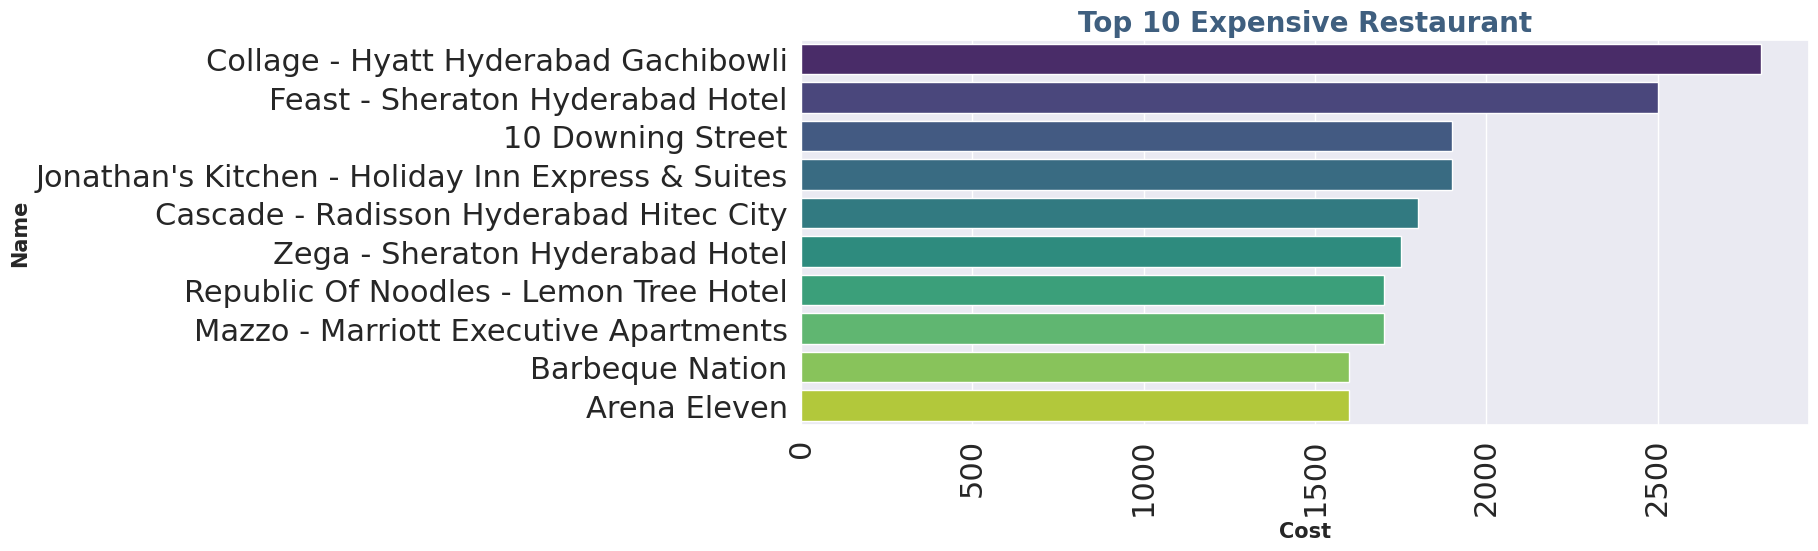

In [48]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(13,5))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

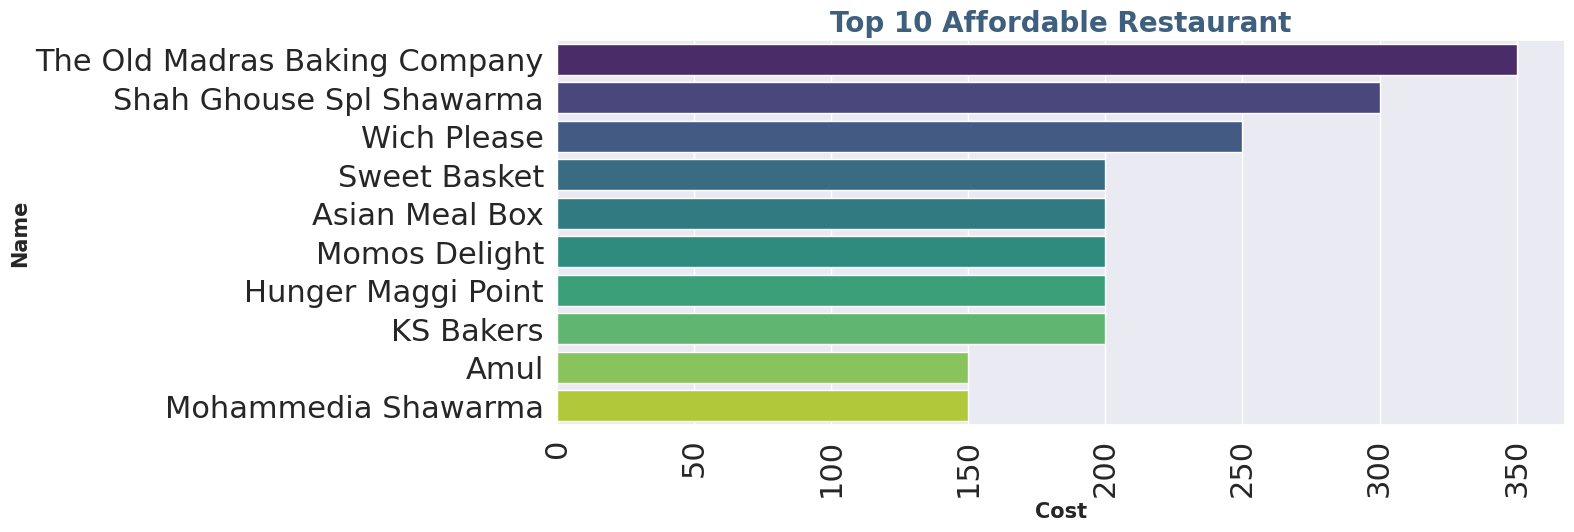

In [49]:
# Affordable price restaurants
plt.figure(figsize=(13,5))
top_10_affor_rest=df_name[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

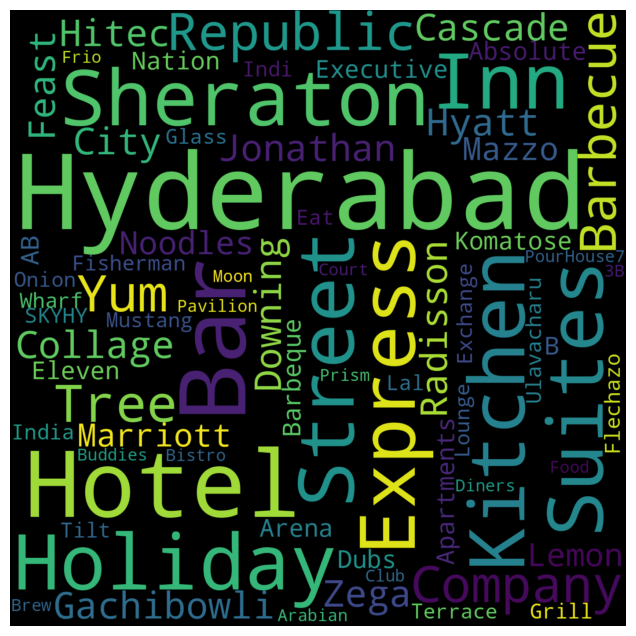

In [51]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in df_name.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

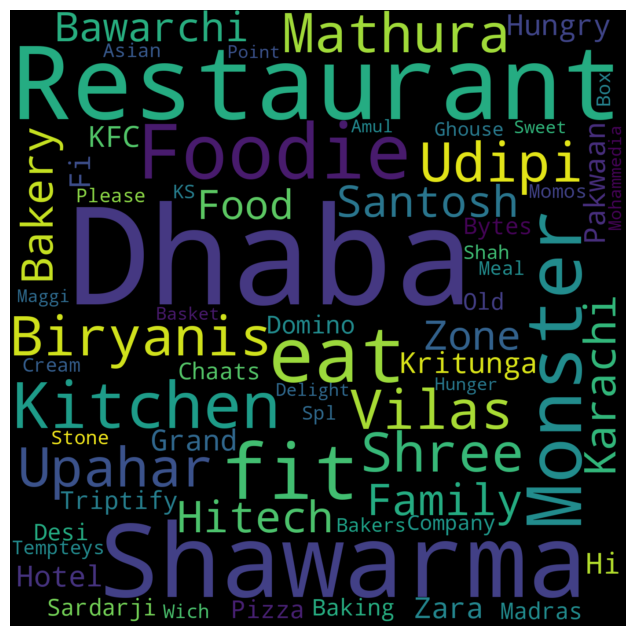

In [53]:
#Creating word cloud for cheap restaurants

plt.figure(figsize=(15,8))
text = " ".join(name for name in df_name.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [54]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

['chinese', 'continental', 'kebab', 'european', 'south indian', 'north indian'],['biryani', 'north indian', 'chinese'],['asian', 'mediterranean', 'north indian', 'desserts'],['biryani', 'north indian', 'chinese', 'seafood', 'beverages'],['asian', 'continental', 'north indian', 'chinese', 'mediterranean'],['seafood', 'goan', 'north indian', 'continental', 'asian'],['healthy food', 'north indian', 'continental', 'south indian'],['lebanese'],['american', 'chinese', 'north indian', 'kebab', 'south indian'],['ice cream', 'desserts'],['street food', 'north indian', 'fast food'],['mediterranean', 'north indian', 'kebab', 'bbq'],['continental', 'american', 'chinese'],['north indian', 'italian', 'finger food'],['european', 'mediterranean', 'north indian'],['burger', 'fast food'],['north indian'],['chinese', 'north indian'],['north indian', 'chinese', 'continental'],['north indian', 'chinese', 'biryani'],['north indian'],['north indian', 'japanese', 'italian', 'salad', 'sushi'],['american'],['ic

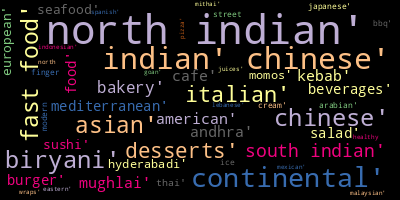

In [59]:
# Visualization of words from 'Cuisines' feature
df_name['Cuisines']= df_name['Cuisines'].astype(str)

ps = PorterStemmer() 
df_name['Cuisines']=df_name['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df_name['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="black", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

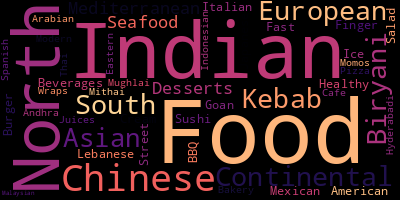

In [61]:
# Most nominated words from 'Cuisine' feature
words_list = cluisine_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(background_color='black',min_font_size = 1,colormap = 'magma').generate(strr) 
wordcloud.to_image()

##**Distribuition of cost column**

<ipython-input-62-2867cb84b0db>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_name['Cost'], kde=True,ax=ax, color = 'g')


<Figure size 1000x500 with 0 Axes>

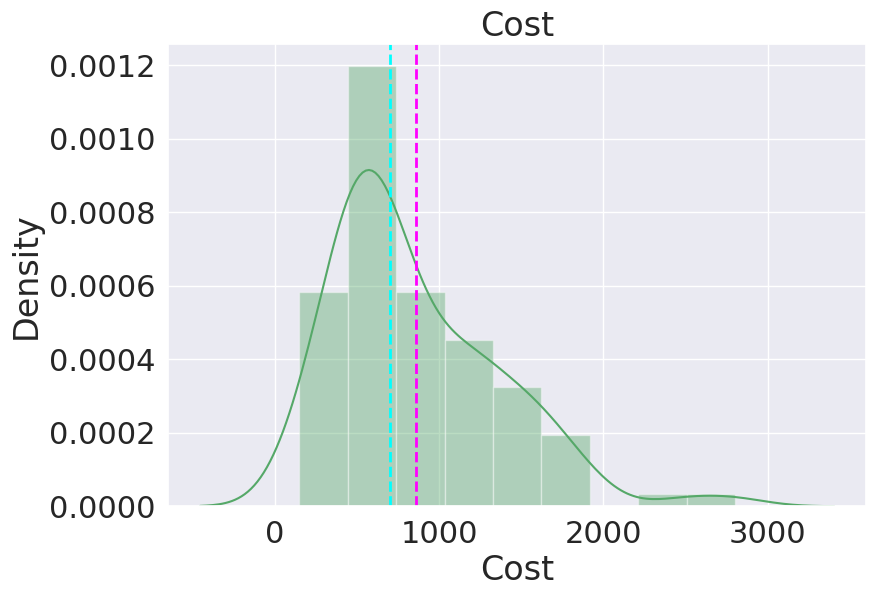

In [62]:
plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
continous = df_name['Cost']
sns.distplot(df_name['Cost'], kde=True,ax=ax, color = 'g')
ax.axvline(continous.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(continous.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Cost')
plt.show()

In [63]:
avg_cost = pd.DataFrame(df_name.groupby(df_name['Name']).agg({'Cost':'mean'})).reset_index()
avg_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
avg_cost.head()

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0


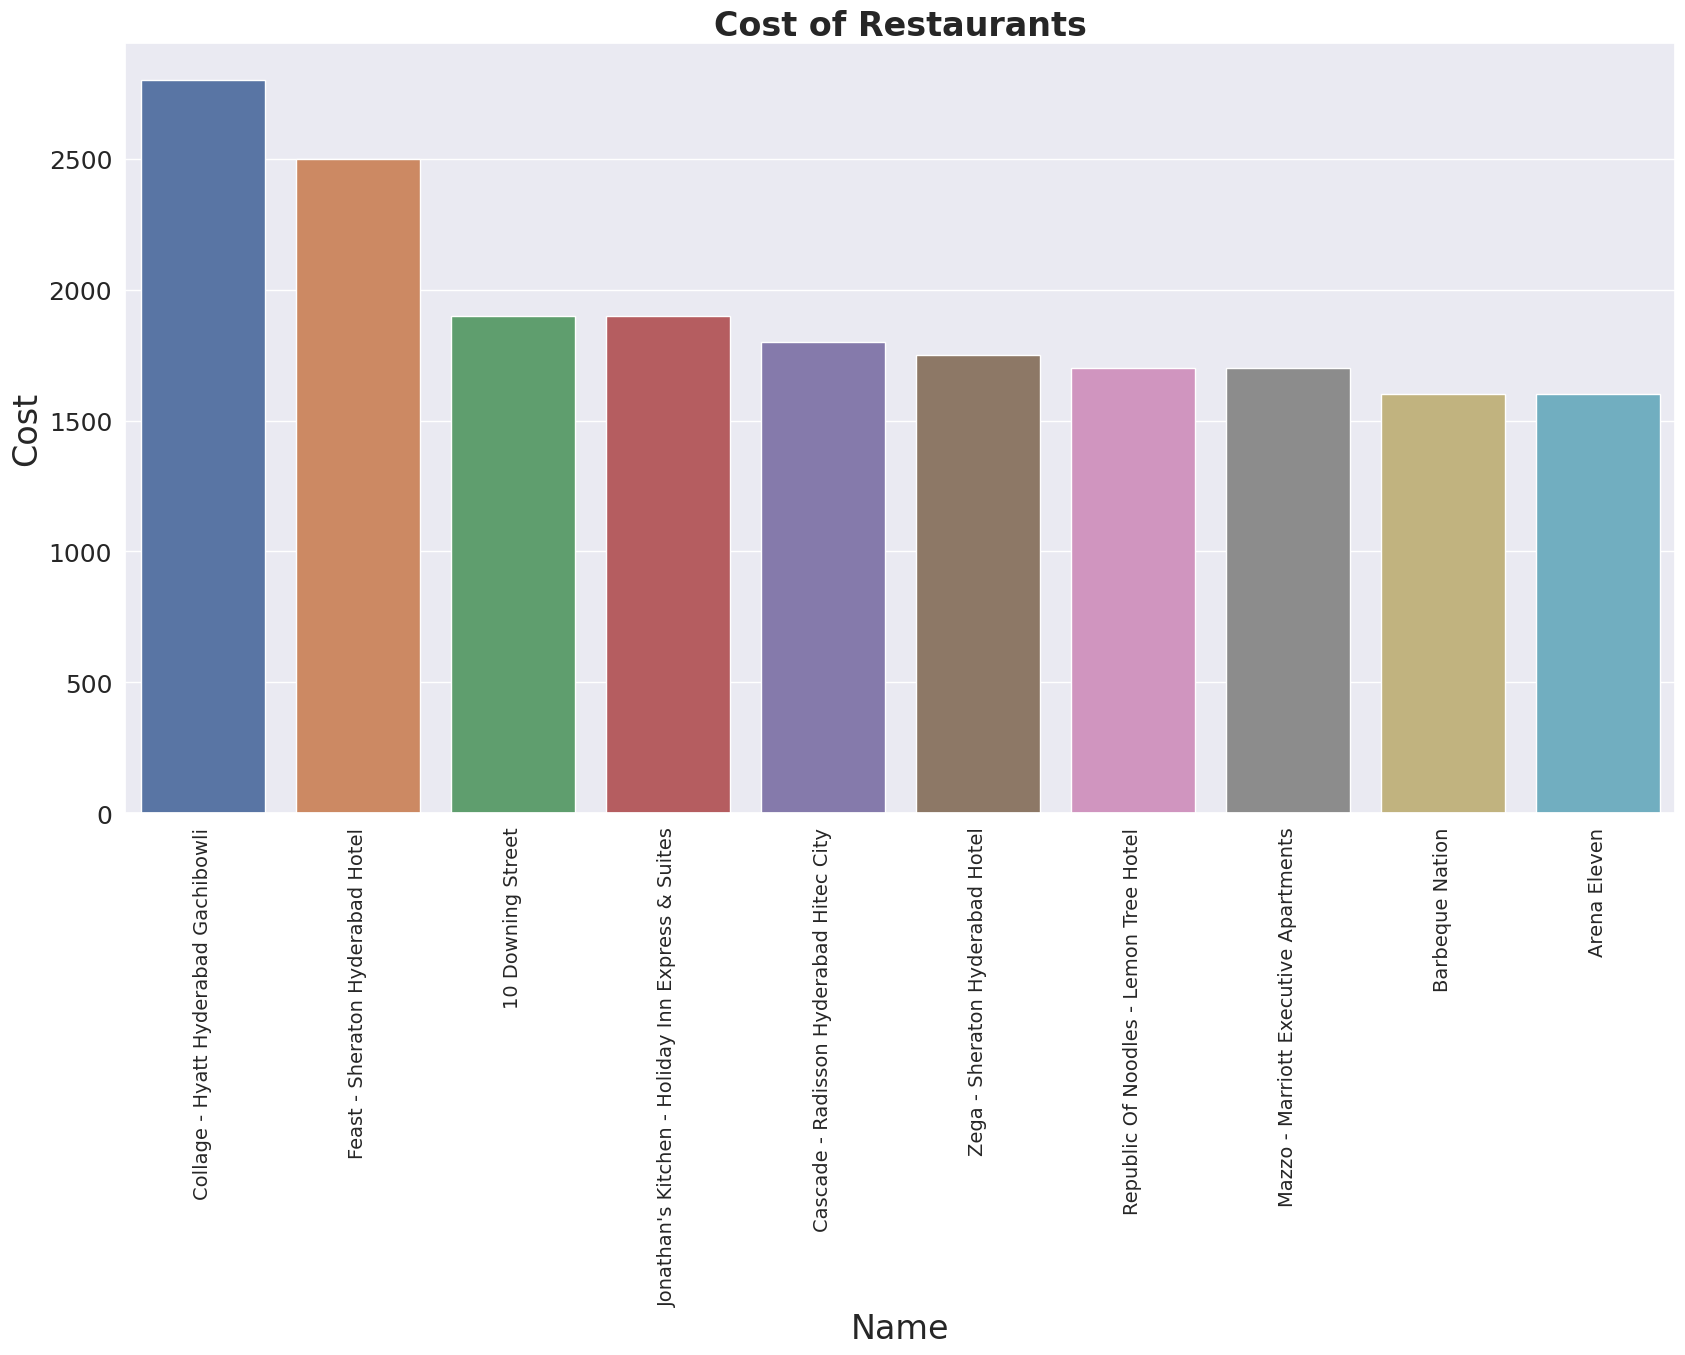

In [64]:
# Visualization of Top 10 Restaurant names and their respective cost
plt.figure(figsize = (20, 10))
sns.set(font_scale = 2)
sns.barplot(data = avg_cost[:10],x = avg_cost['Name'][:10],y = avg_cost['Cost'][:10])
plt.title('Cost of Restaurants',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [65]:
# Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df_name[['Cuisines','Links','Timings']])

In [66]:
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [67]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"['chinese', 'continental', 'kebab', 'european'...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"['biryani', 'north indian', 'chinese']",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"['asian', 'mediterranean', 'north indian', 'de...","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"['biryani', 'north indian', 'chinese', 'seafoo...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"['asian', 'continental', 'north indian', 'chin...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [68]:
df_name['Cuisines']= df_name['Cuisines'].astype(str)

**Create functions for preprocessing**

In [69]:
# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
      word = str(word)
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [70]:
# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df_name[col_lst] = normalize(df_name[col_lst])

In [71]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani north indian chinese,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,1300,asian mediterranean north indian desserts,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani north indian chinese seafood beverages,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,1200,asian continental north indian chinese mediter...,12noon to 11pm mon tue wed thu sun 12noon to 1...


##**Preprocessing the dataset for Clustering models**

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [73]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(df_name['Cuisines'])

In [74]:
X.shape

(105, 47)

In [75]:
# Type of X object
type(X)

scipy.sparse._csr.csr_matrix

In [76]:
# Converting 'X' object to array
X = X.toarray()

In [77]:
type(X)

numpy.ndarray

##**Elbow method to find appropriate 'K' value**

In [78]:
from yellowbrick.cluster import KElbowVisualizer

In [79]:
# Function to find appropriate 'K' value
def KElbowvisualizer(metric):
  model = KMeans(max_iter=300,random_state=0)
  plt.figure(figsize=(10,5))
  sns.set(font_scale = 1)
  visualizer = KElbowVisualizer(model, k=(2,20),metric= metric, timings= False, locate_elbow= False)
  # # Fit the data to the visualize
  visualizer.fit(X)  
  visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

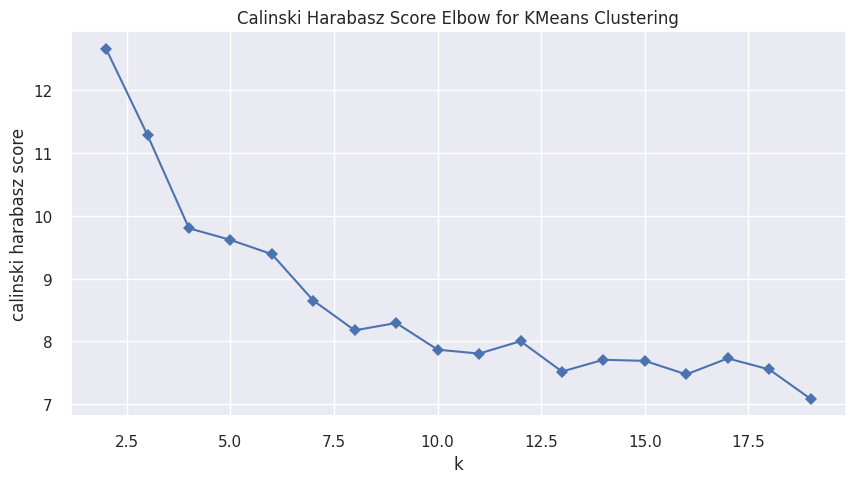

In [80]:
# KElbowvisualizer with metric as 'calinski_harabasz'
KElbowvisualizer('calinski_harabasz')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

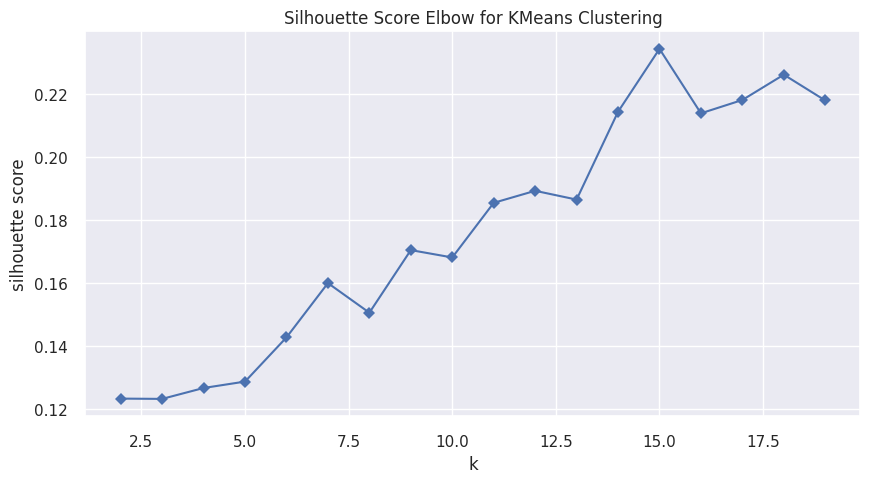

In [81]:
# KElbowvisualizer with metric as 'silhouette'
KElbowvisualizer('silhouette')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

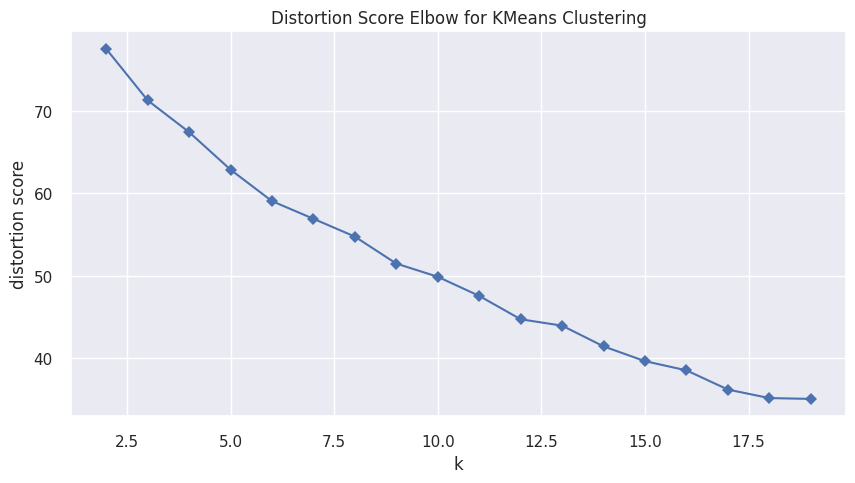

In [82]:
# KElbowvisualizer with metric as 'distortion
KElbowvisualizer('distortion')

**From Elbow method, we got k=15 as optimum value for cluster**

##**Calculate Silhoutte scores to find appropriate 'K' value**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.13303050004562433
For n_clusters = 3 The average silhouette_score is : 0.12243619641201332


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.13159121776614843
For n_clusters = 5 The average silhouette_score is : 0.14275304162568808


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.13903481515011362
For n_clusters = 7 The average silhouette_score is : 0.14282646510716074


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.1593251458323918
For n_clusters = 9 The average silhouette_score is : 0.16445298840864558


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.16847499367100097
For n_clusters = 11 The average silhouette_score is : 0.1751651623186889


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.19923724986385843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average silhouette_score is : 0.1823666288730717


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.2196048814473123


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.223466153992775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 The average silhouette_score is : 0.22140196036264412


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17 The average silhouette_score is : 0.22544660976892683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 The average silhouette_score is : 0.23418522246678014


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19 The average silhouette_score is : 0.23557648776625728
For n_clusters = 20 The average silhouette_score is : 0.25298907123683173


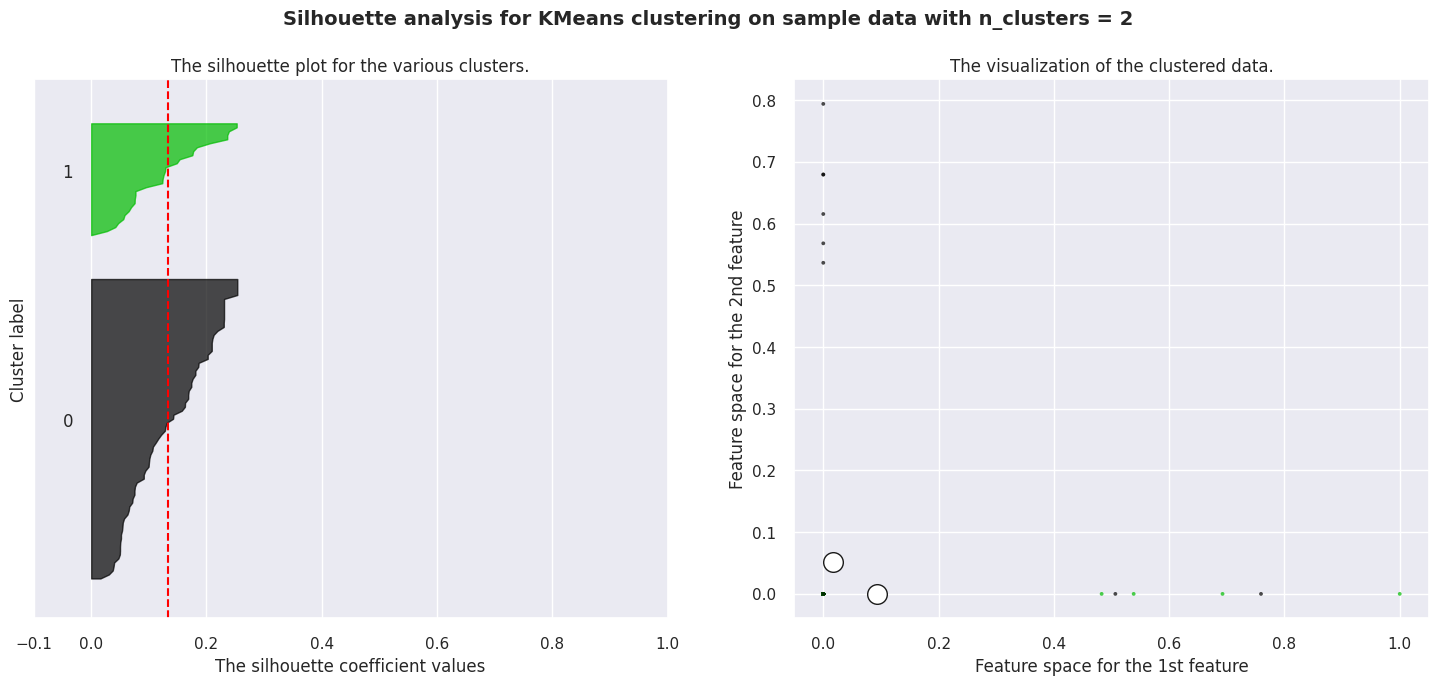

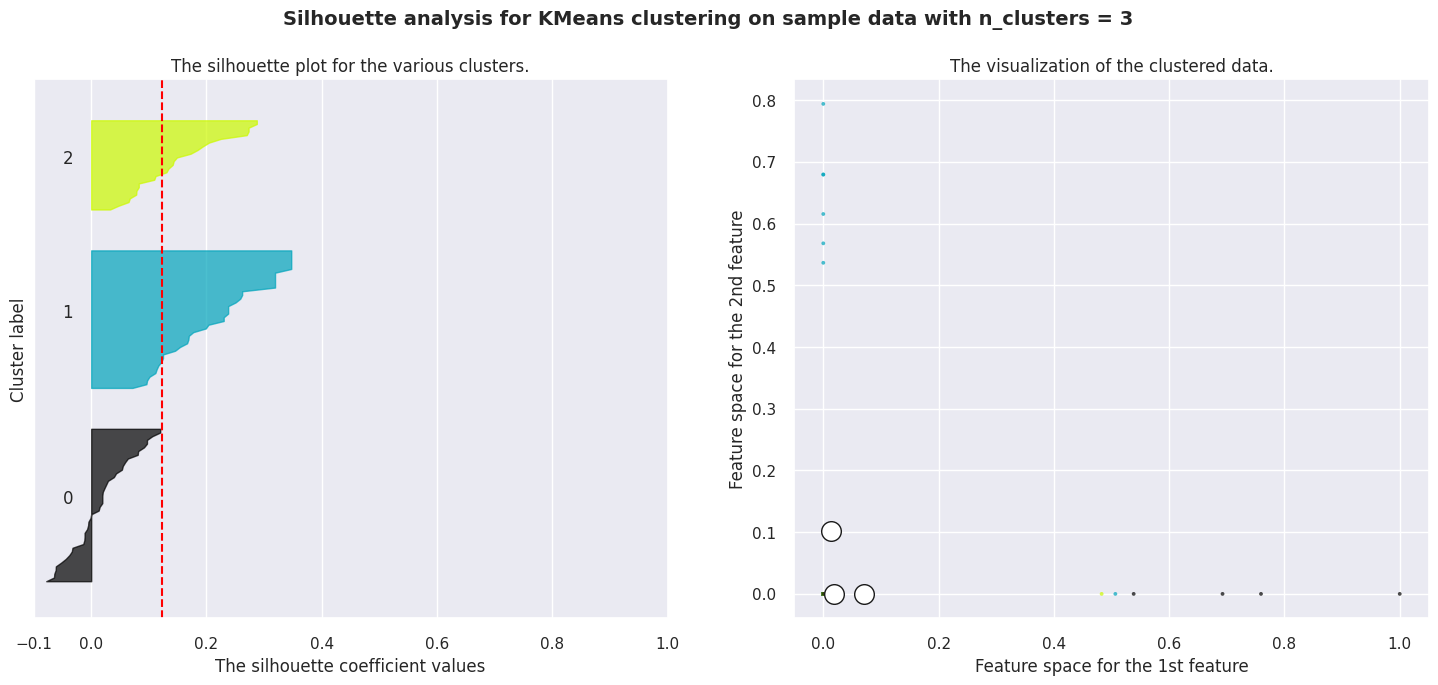

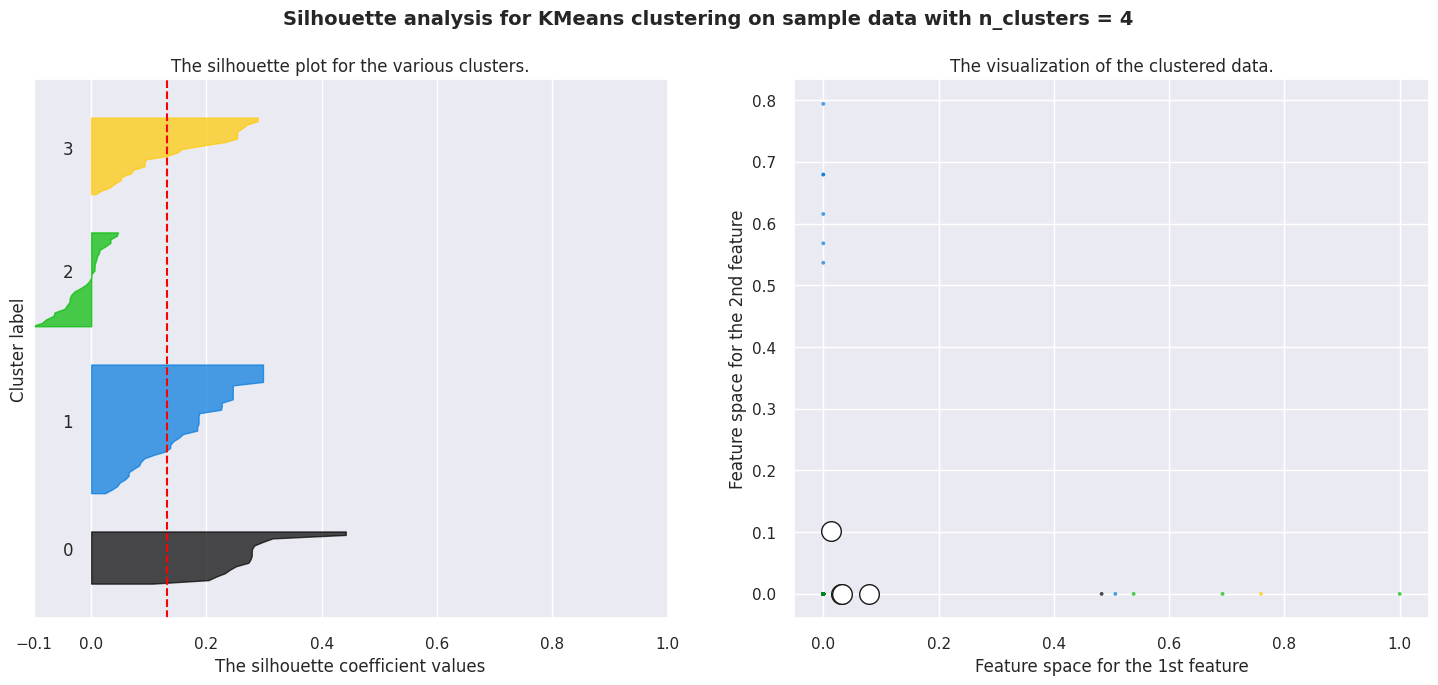

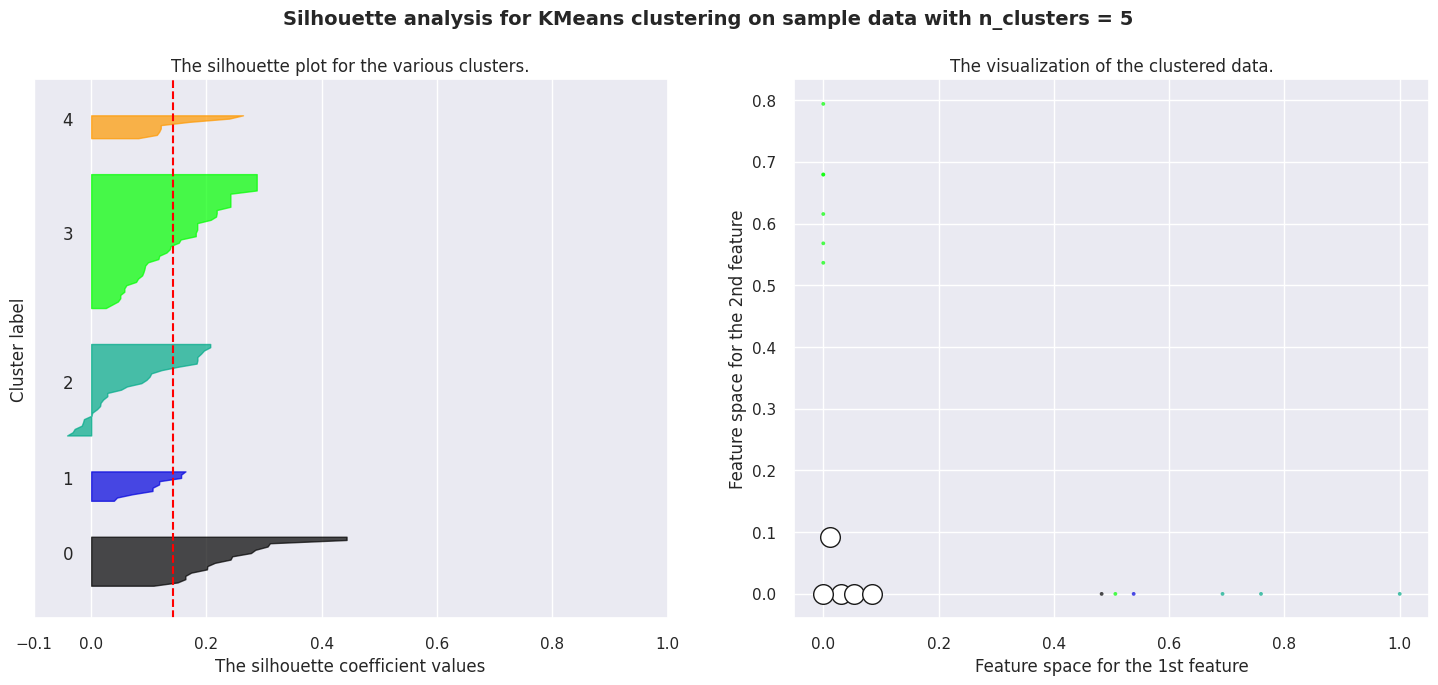

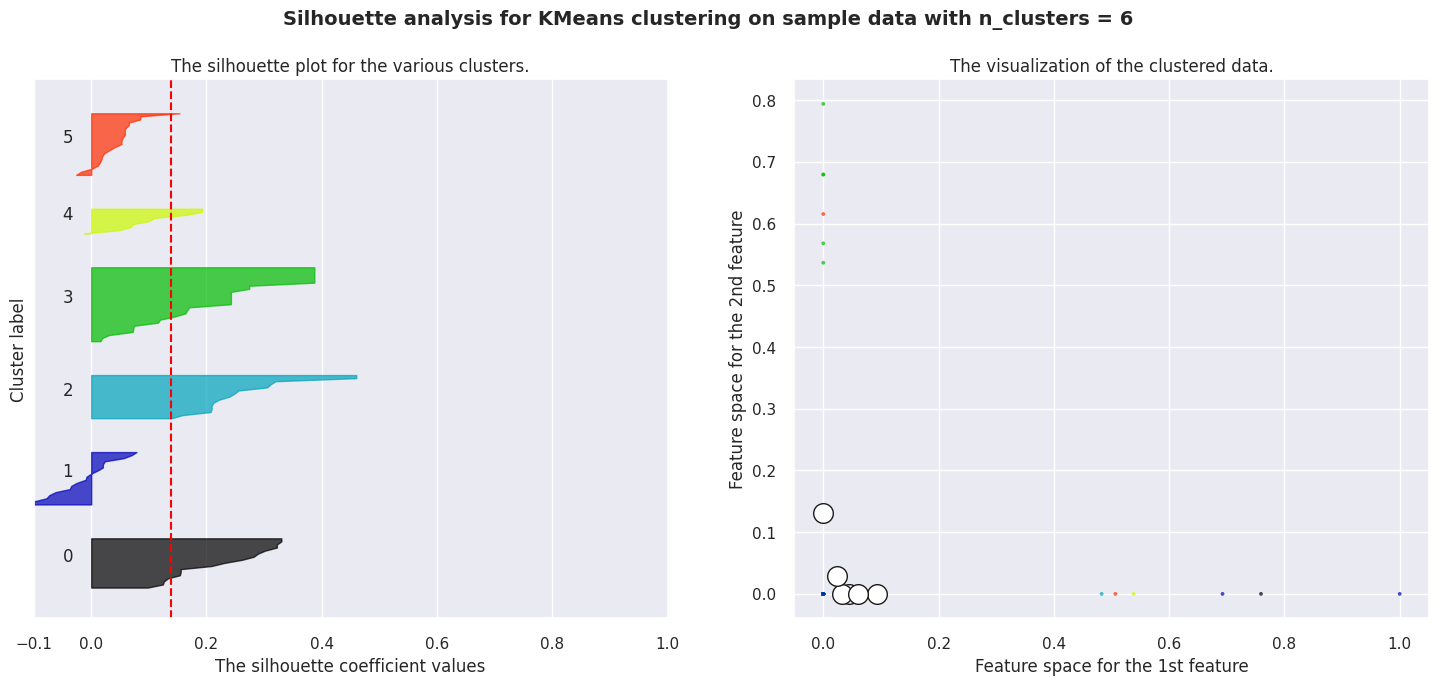

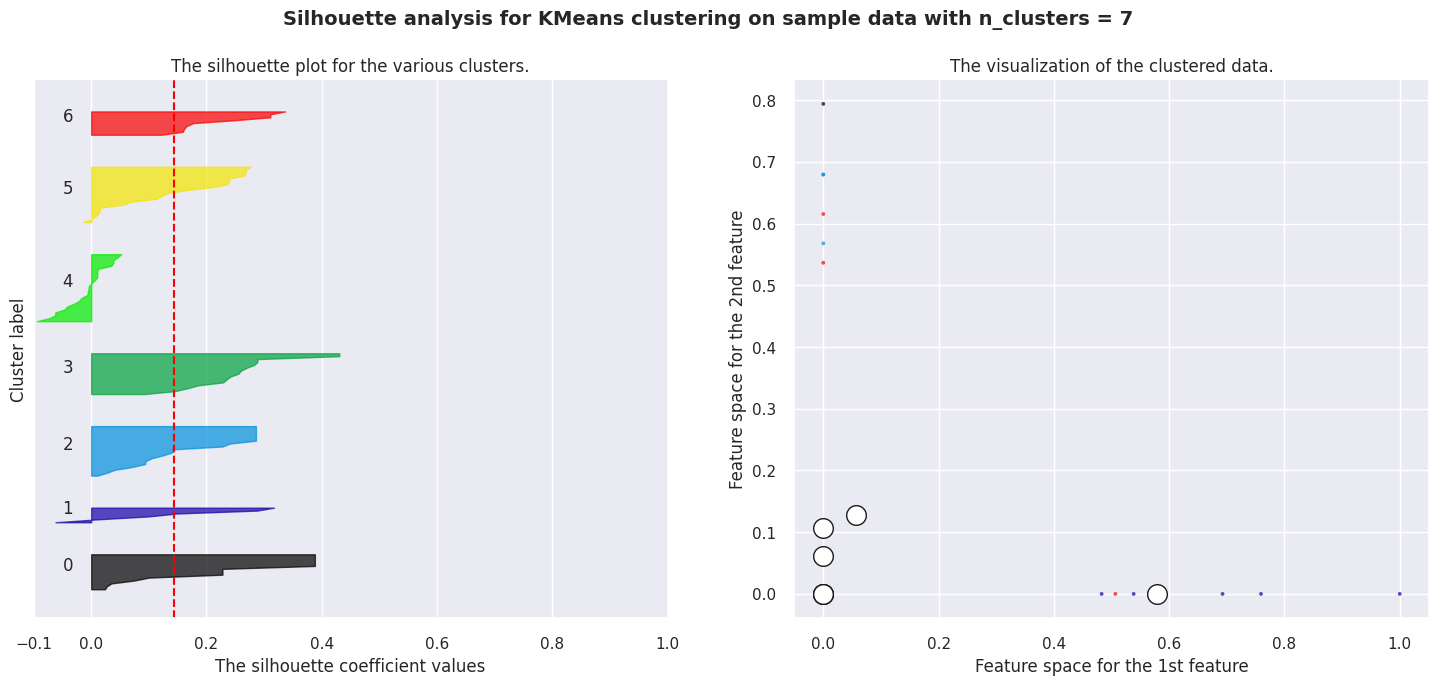

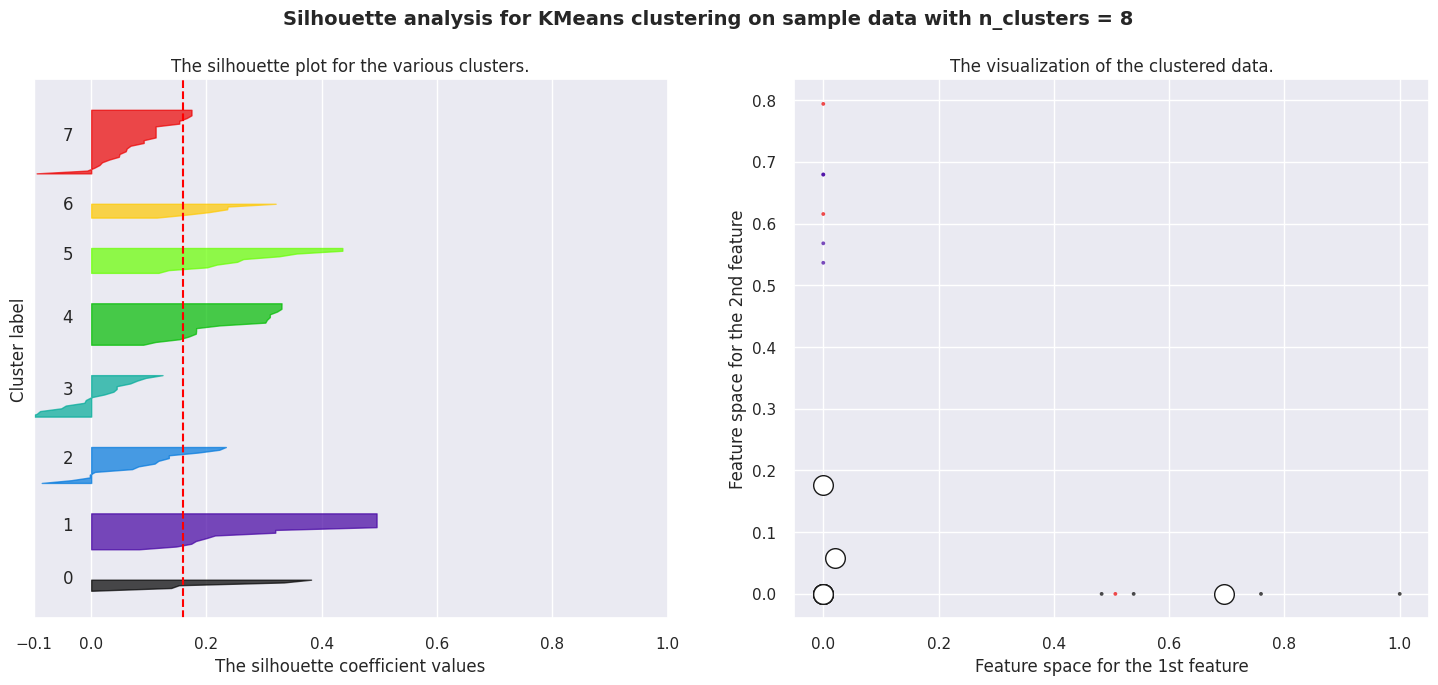

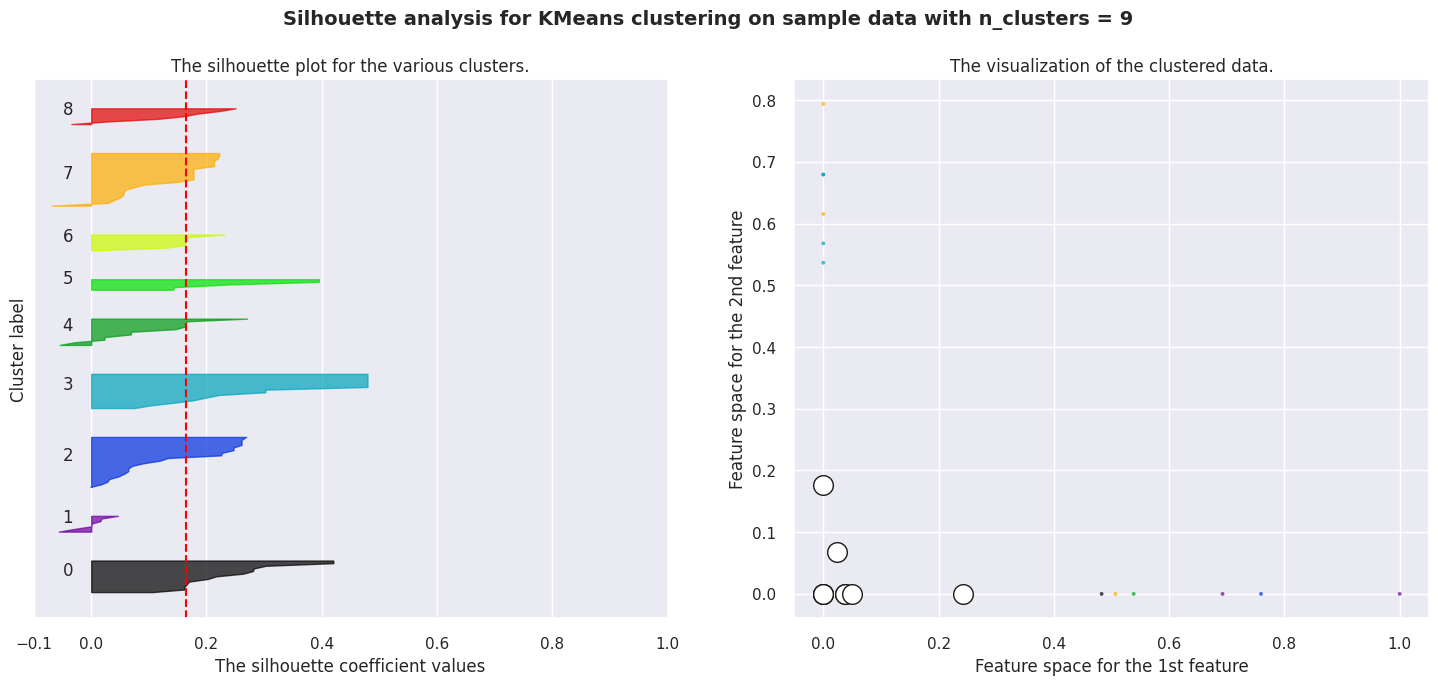

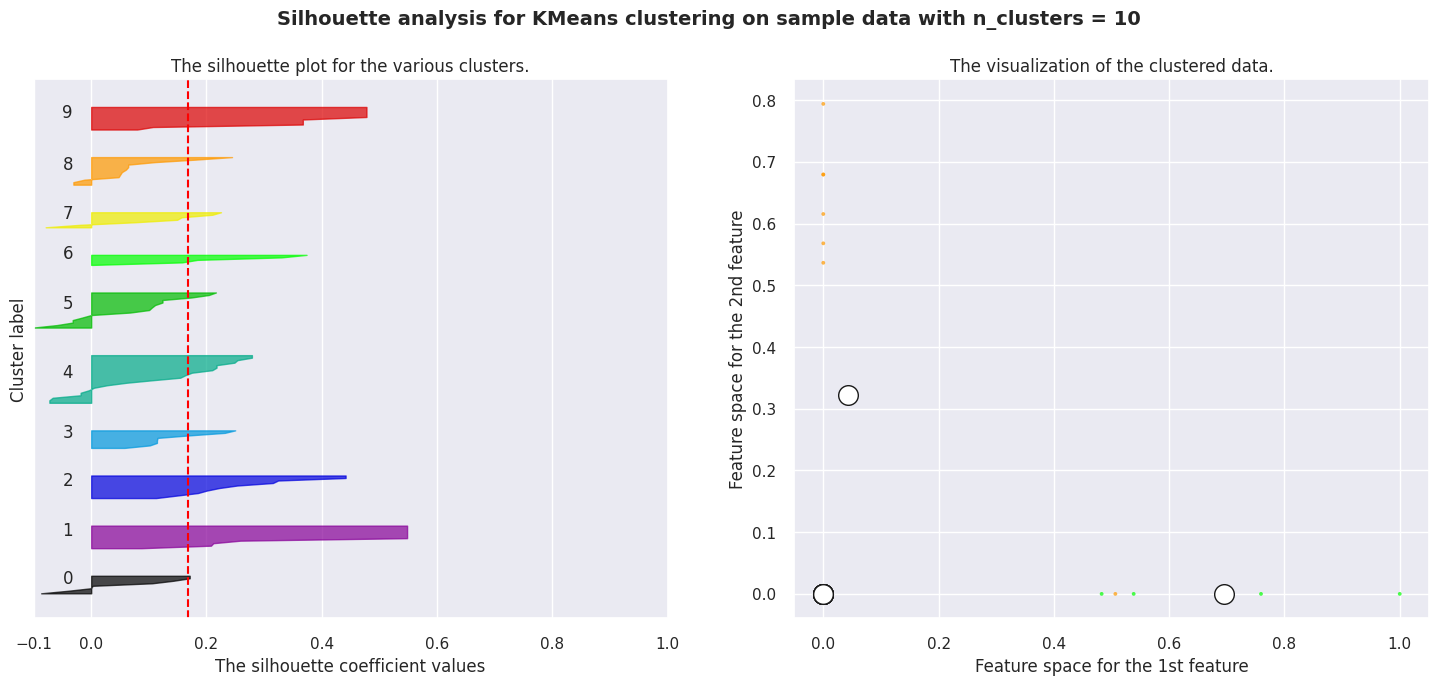

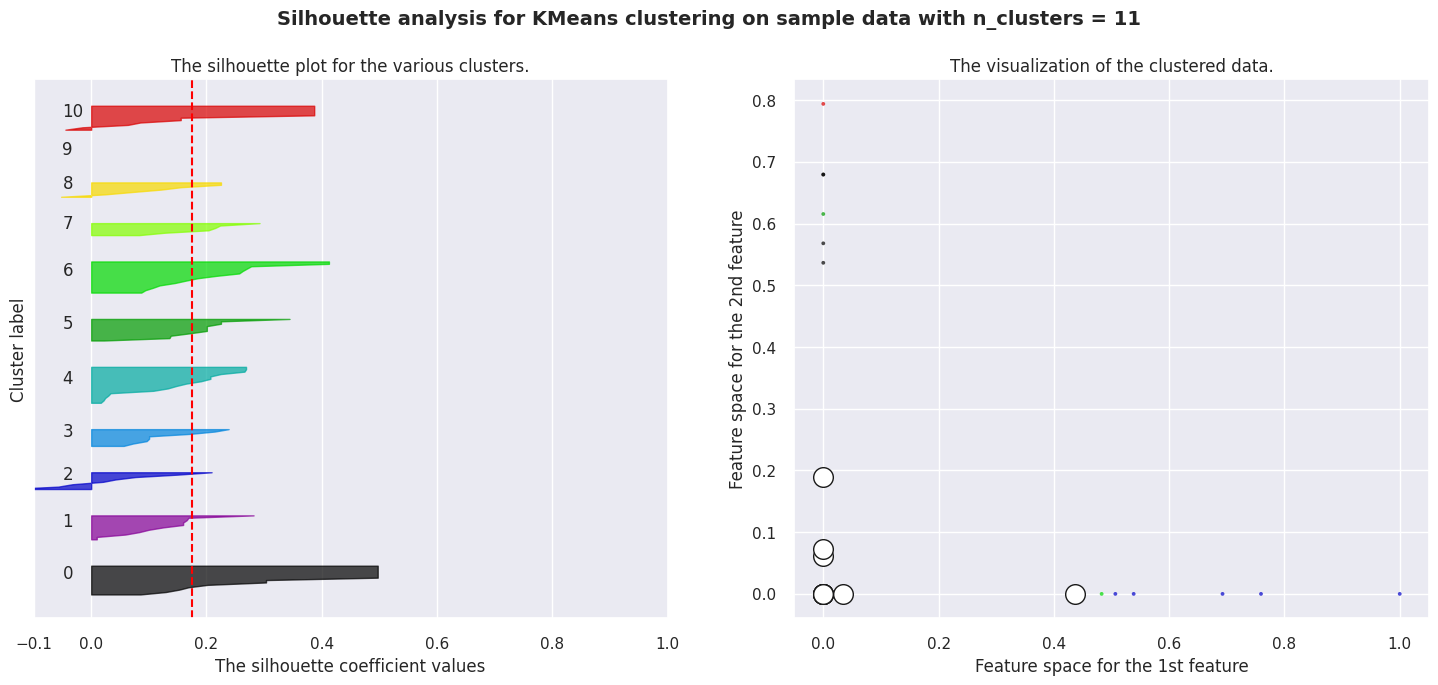

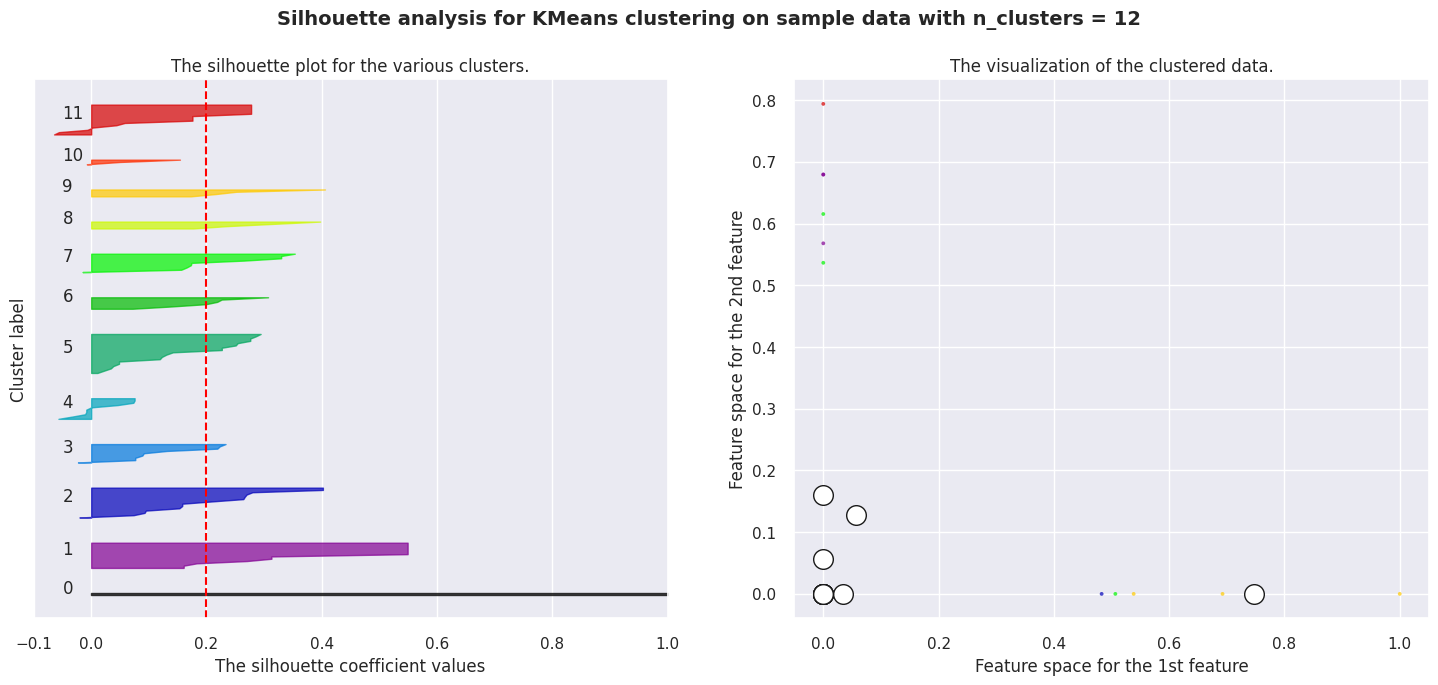

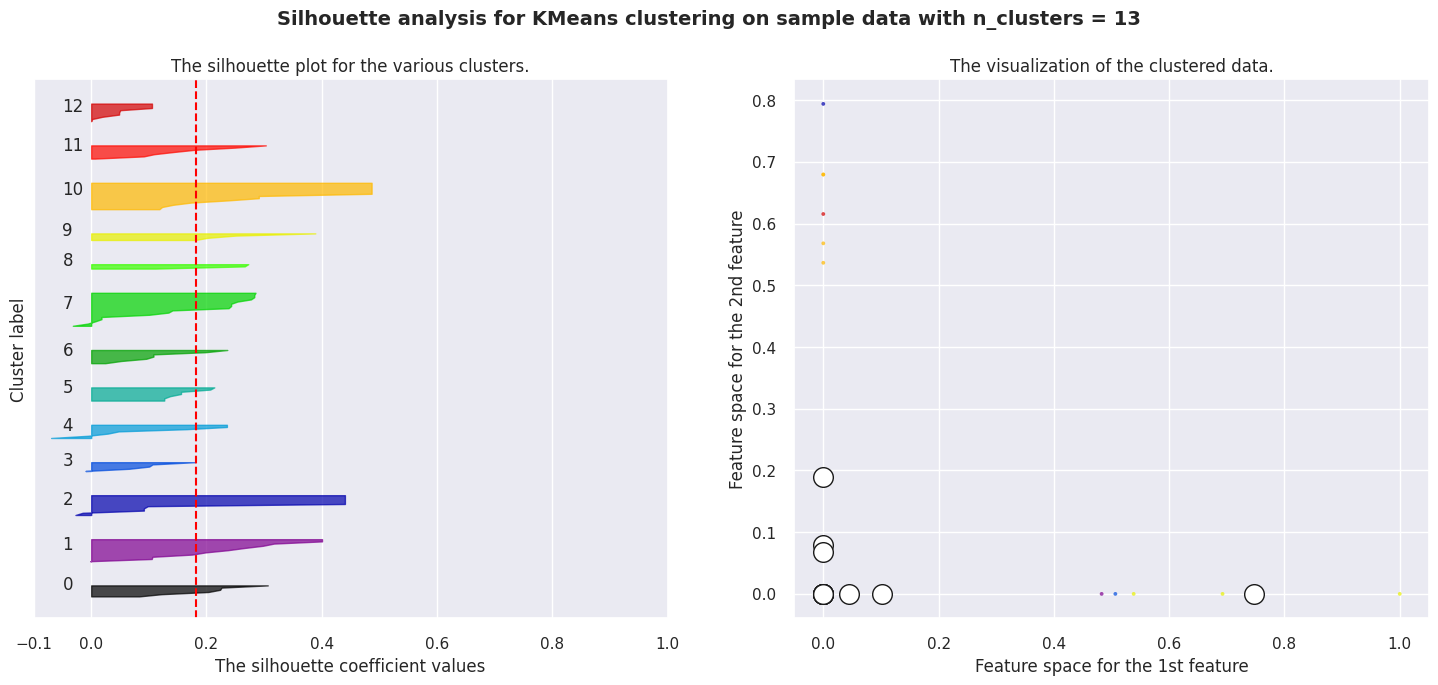

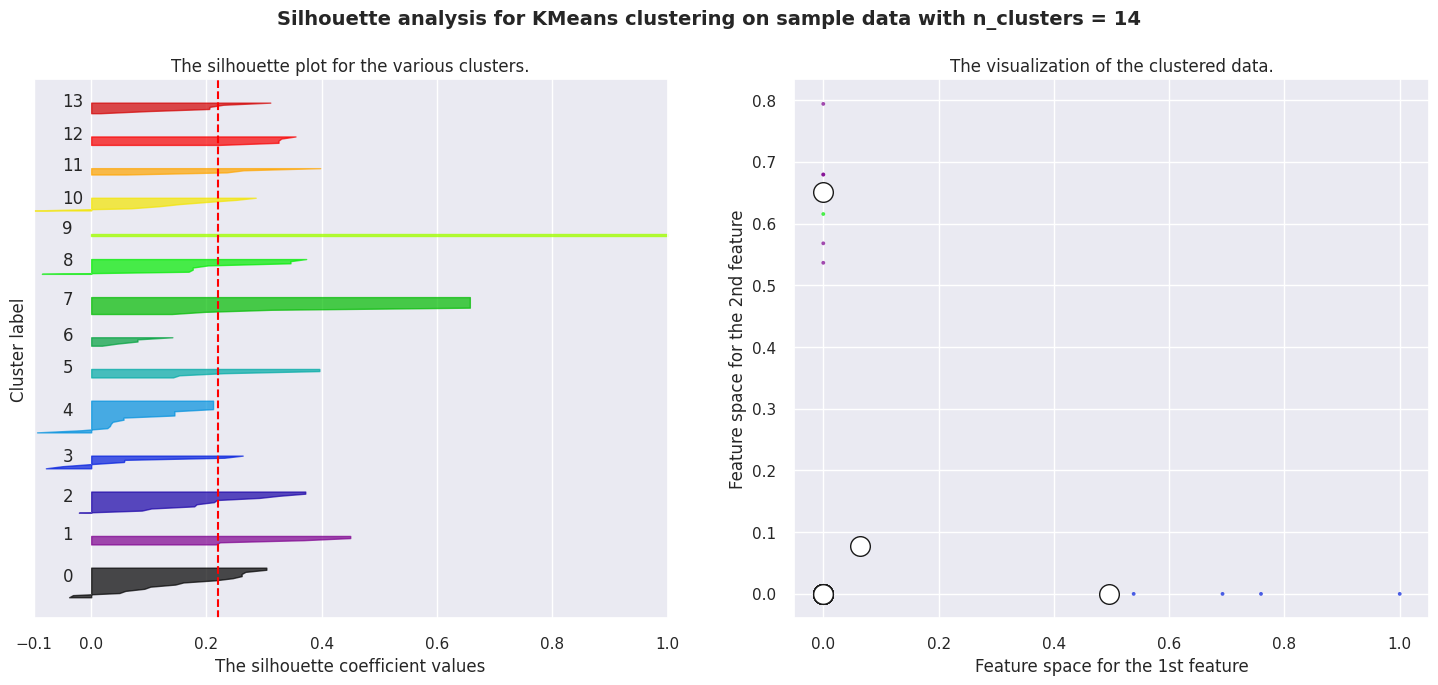

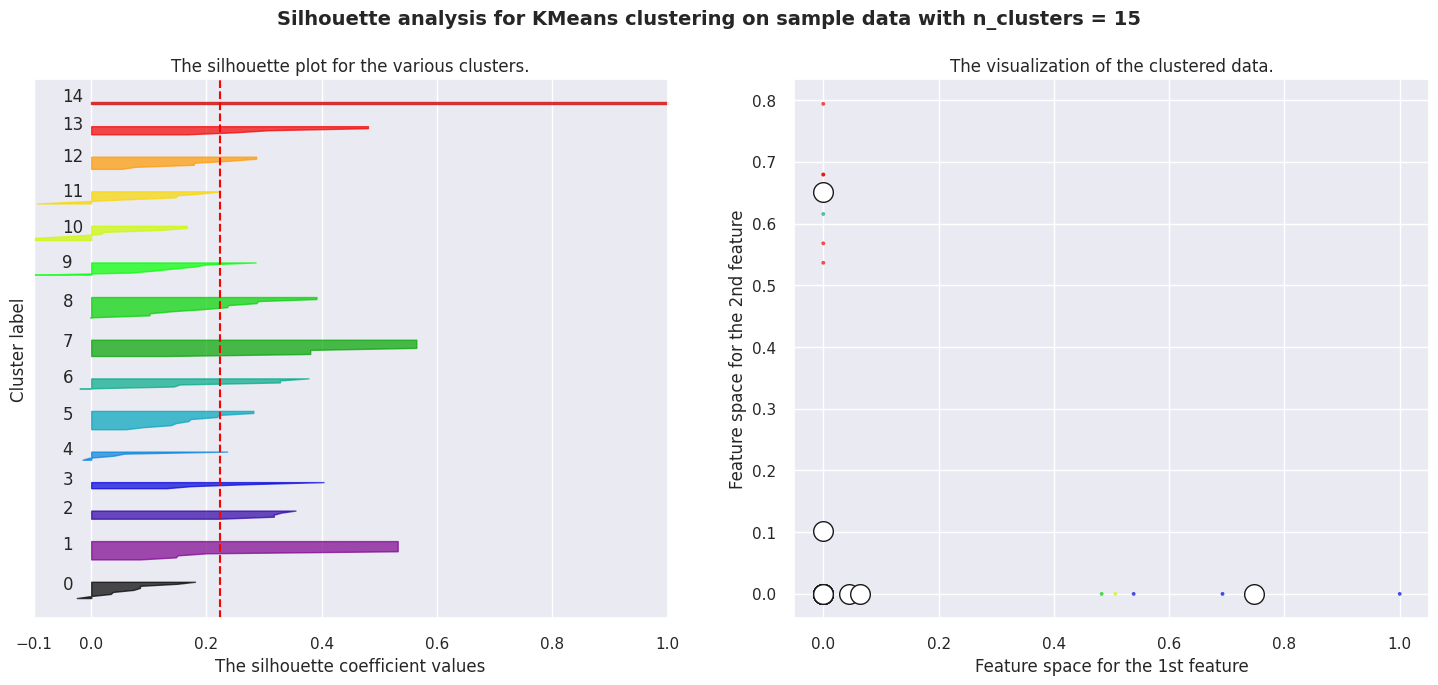

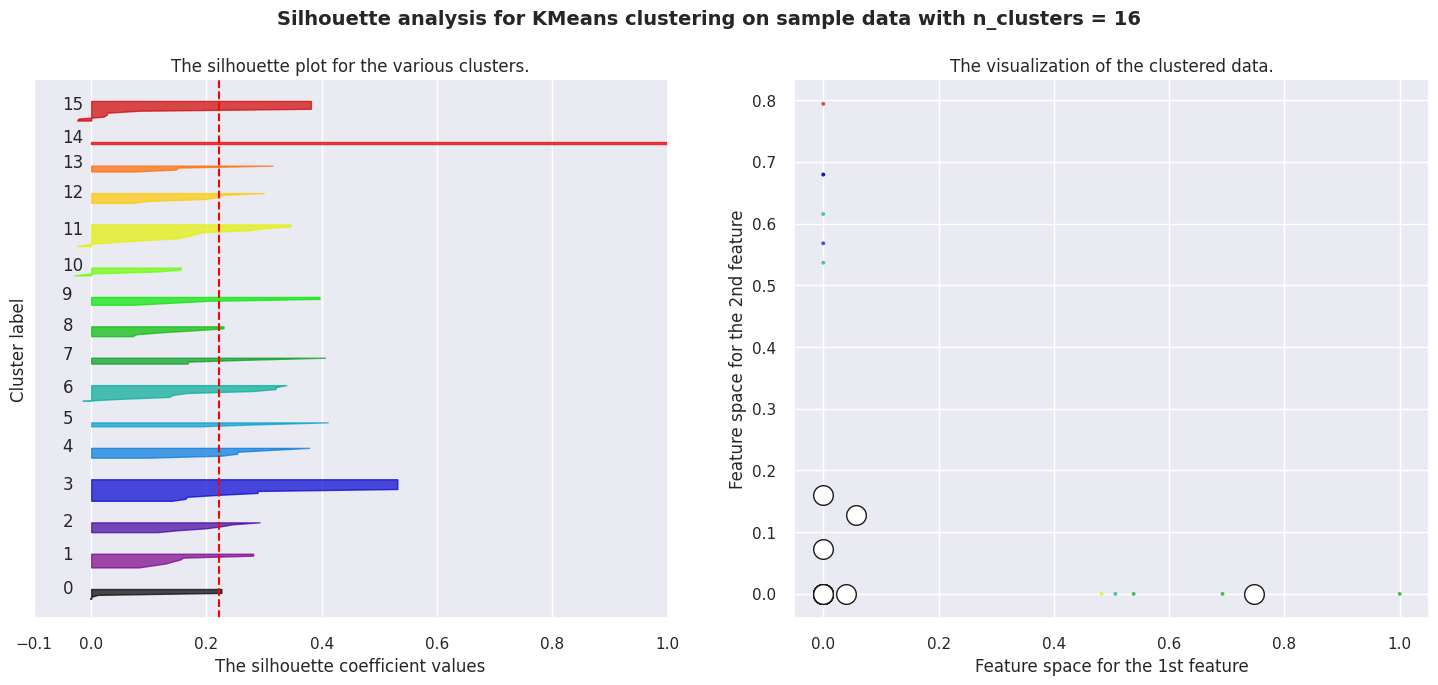

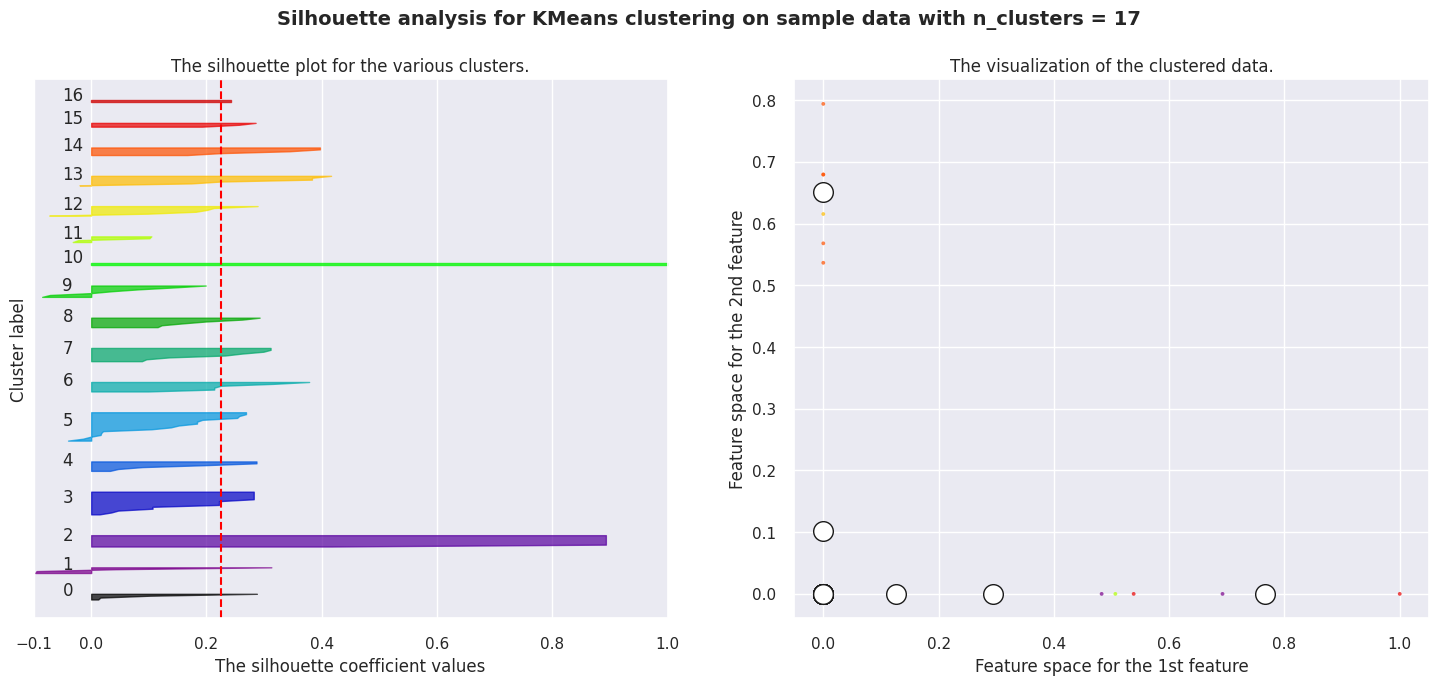

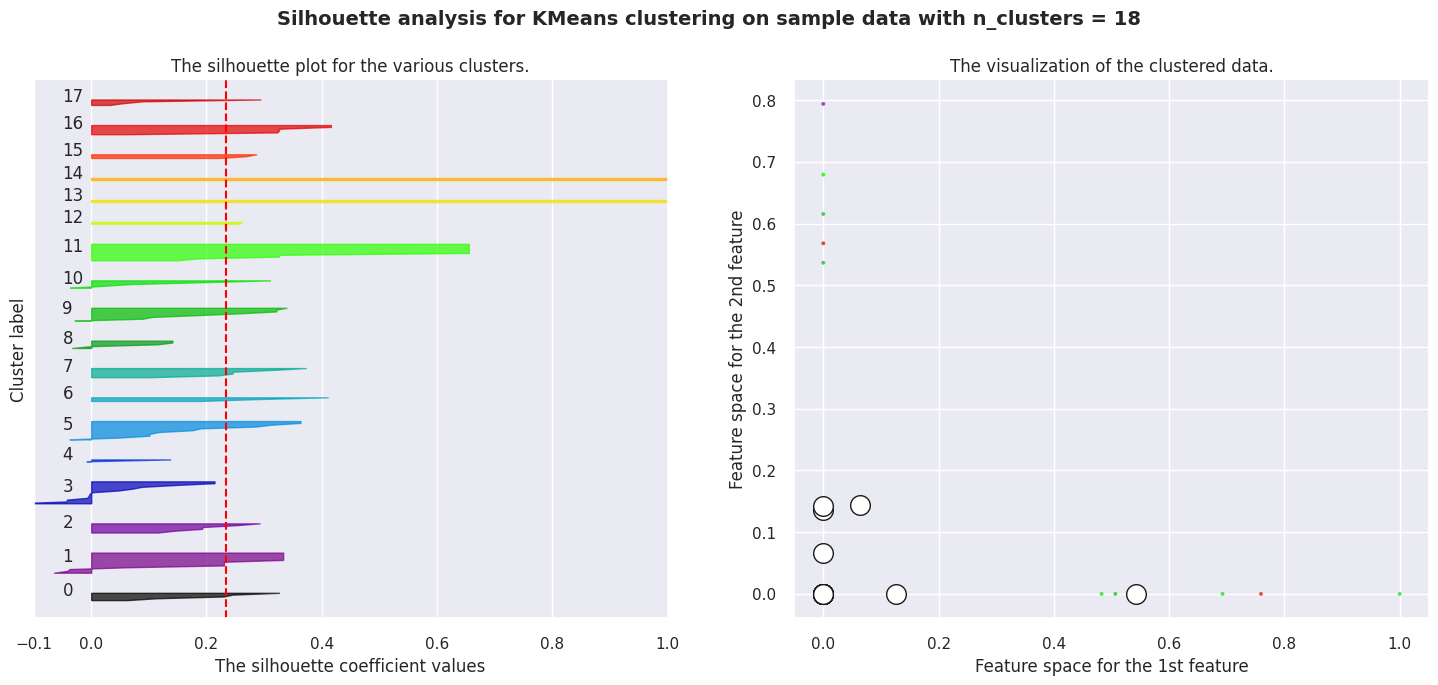

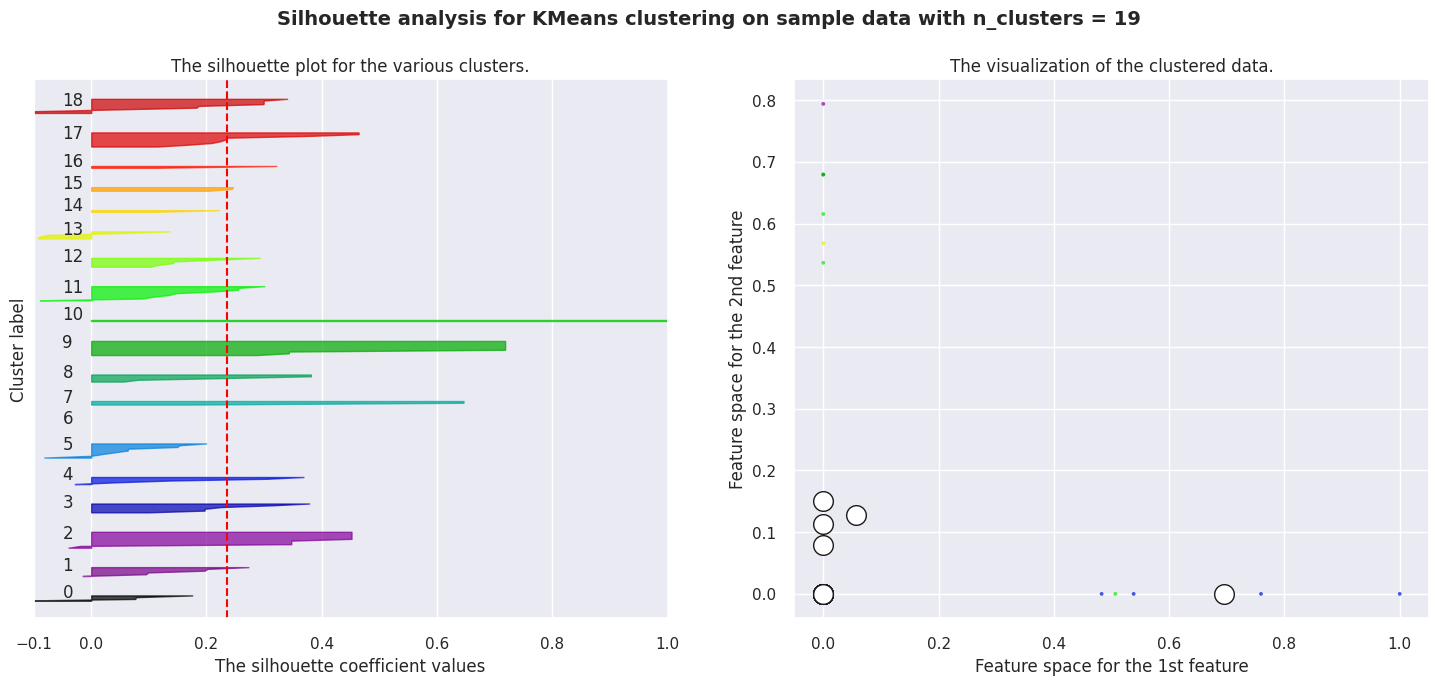

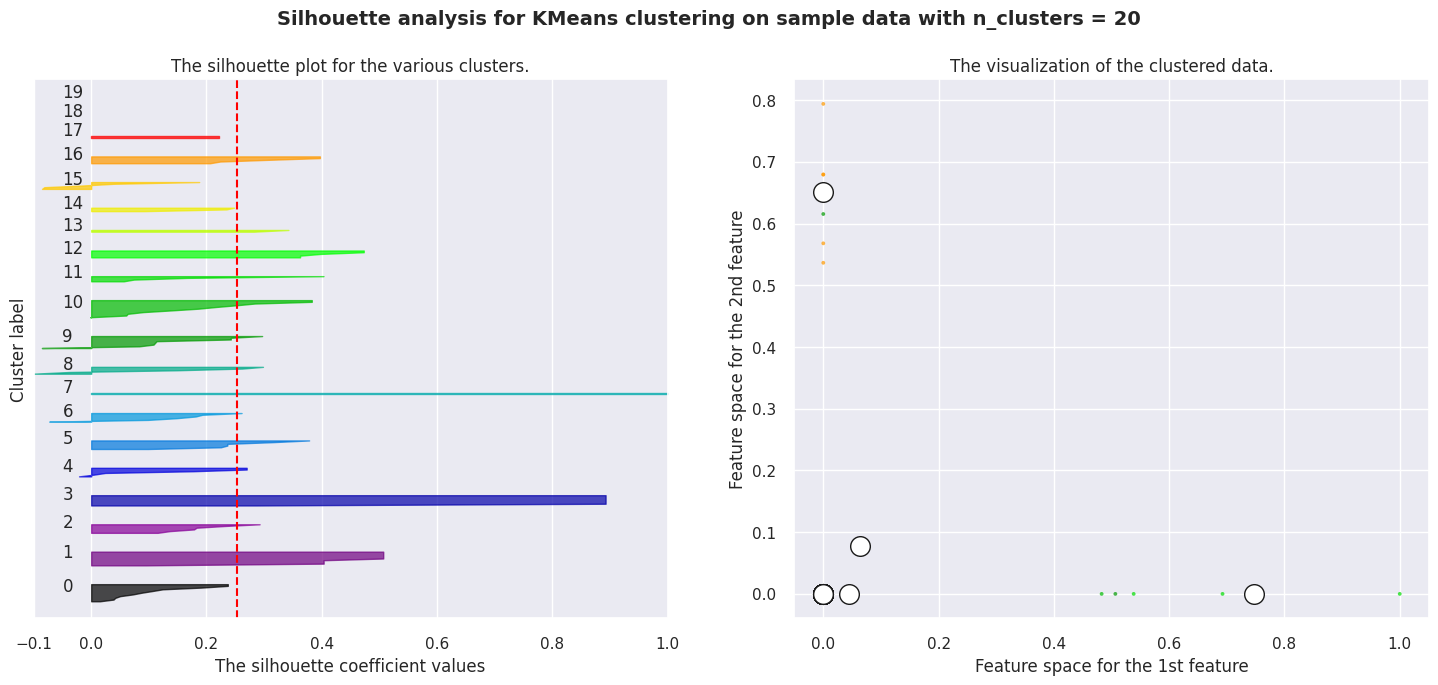

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sillhouette_cluster_values={}

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    sillhouette_cluster_values[n_clusters] = silhouette_avg

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [86]:
silhouette_avg

0.25298907123683173

In [87]:
sillhouette_cluster_values

{2: 0.13303050004562433,
 3: 0.12243619641201332,
 4: 0.13159121776614843,
 5: 0.14275304162568808,
 6: 0.13903481515011362,
 7: 0.14282646510716074,
 8: 0.1593251458323918,
 9: 0.16445298840864558,
 10: 0.16847499367100097,
 11: 0.1751651623186889,
 12: 0.19923724986385843,
 13: 0.1823666288730717,
 14: 0.2196048814473123,
 15: 0.223466153992775,
 16: 0.22140196036264412,
 17: 0.22544660976892683,
 18: 0.23418522246678014,
 19: 0.23557648776625728,
 20: 0.25298907123683173}

Text(0, 0.5, 'Sillhouette scores')

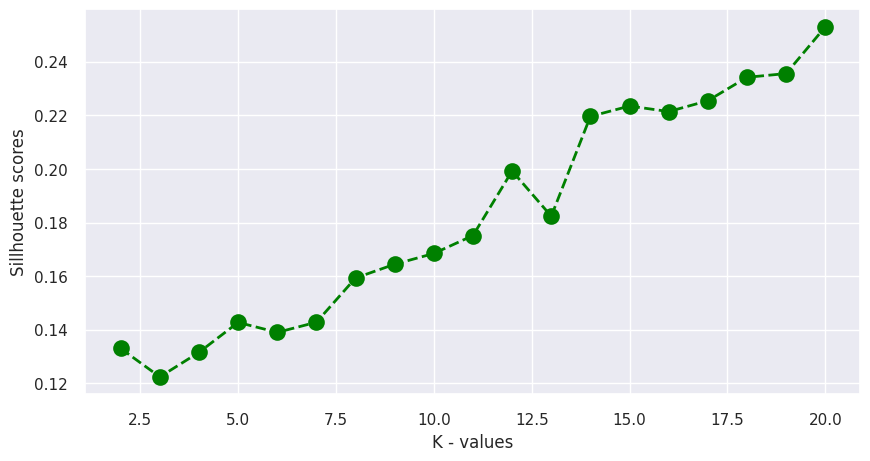

In [88]:
x = list(sillhouette_cluster_values.keys())
y = list(sillhouette_cluster_values.values())
plt.figure(figsize=(10,5))
plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel("K - values")
plt.ylabel("Sillhouette scores")

**From the above graph we can take k = 15 as optimum value of silhouette score, as compared to Elbow method also we found k=15 as best value.**

In [89]:
# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

In [90]:
# MOdel fit
kmeans.fit(X)

KMeans(n_clusters=15, n_init=1, random_state=0)

In [91]:
#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [92]:
# Clusters center
clusters_center = kmeans.cluster_centers_

In [93]:
[df_name['Cuisines'][15]]

['burger fast food']

In [94]:
# Testing

X_new= vectorizer.transform([df_name['Cuisines'][15]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

9

In [95]:
# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.187


In [96]:
# Creating new feature to store labels
df_name['Kmeans_labels'] = kmeans.labels_

In [97]:
# Creating a DataFrame for KMeans Labels visualization
Kmeans_labels_count = pd.DataFrame(df_name.groupby(['Kmeans_labels'])['Cuisines'].count()).reset_index()

In [98]:
Kmeans_labels_count.head()

,Kmeans_labels,Cuisines
0,0,2
1,1,3
2,2,13
3,3,8
4,4,8


In [99]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Kmeans_labels'], dtype='object')

In [100]:
def labelsnobs(dataframe,x_value,y_value,palette_type,title,y_label):
  plt.figure(figsize = (20, 8))
  sns.set(font_scale = 2)
  sns.barplot(data = dataframe,x = x_value,y = y_value,palette=palette_type)
  plt.title(title,fontweight='bold')
  plt.ylabel(y_label)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.yticks(fontsize = 18)
  plt.show()

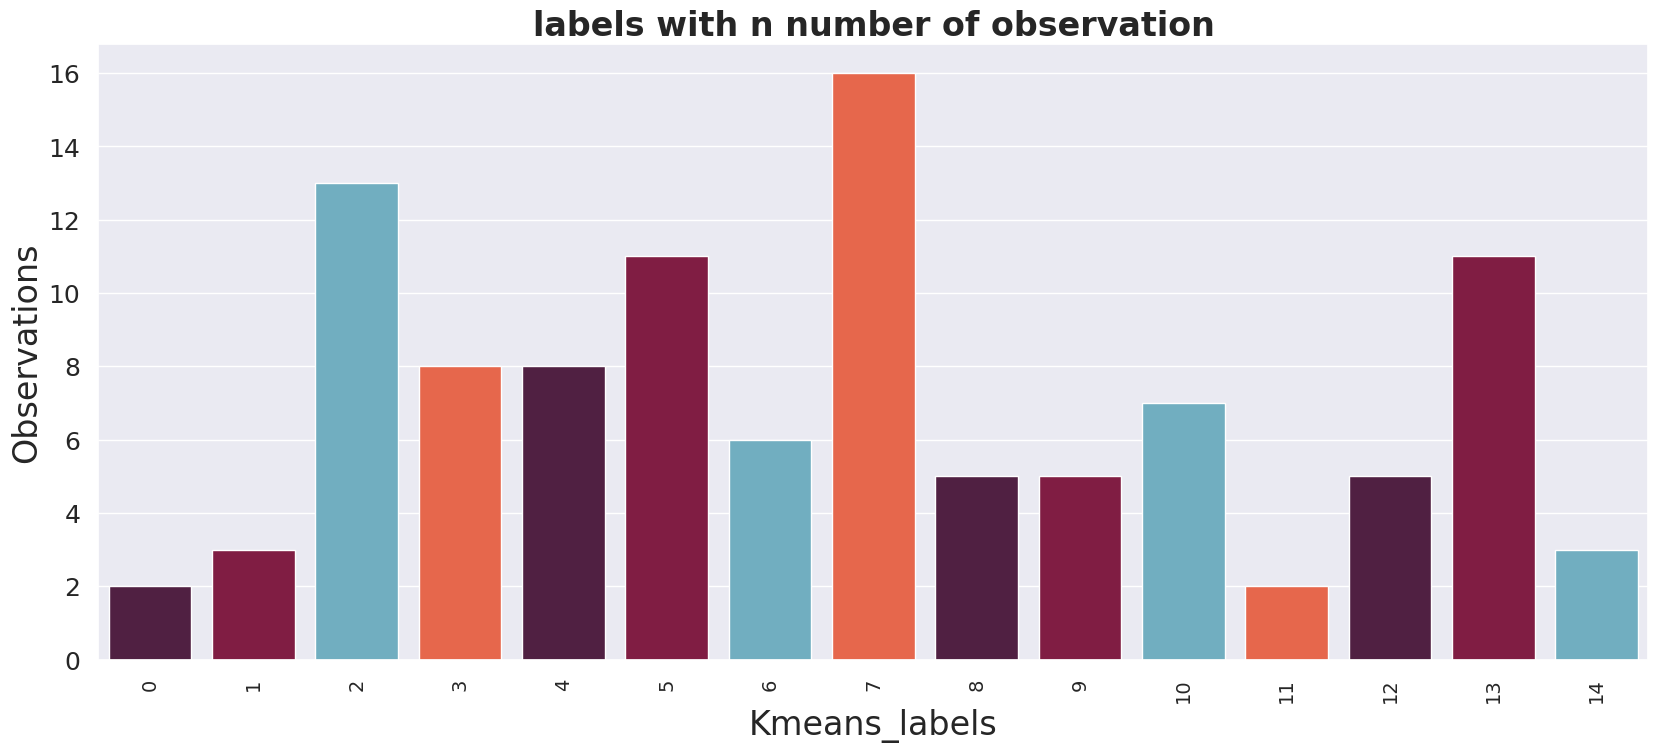

In [101]:
# Visualization of Labels with n number of observations
labelsnobs(Kmeans_labels_count,Kmeans_labels_count['Kmeans_labels'],Kmeans_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [104]:
# Grouping 'Kmeans_labels' and 'Name' feature
Kmeans_labels_name = pd.DataFrame(df_name.groupby(['Kmeans_labels'])['Name'],columns = ['KMeans_Cluster_labels','Restaurants'])
Kmeans_labels_name.set_index('KMeans_Cluster_labels', inplace=True)

In [105]:
# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Kmeans_labels_name['Restaurants'][i])

Cluster:0
13    The Lal Street - Bar Exchange
44       La La Land - Bar & Kitchen
Name: Name, dtype: object
Cluster:1
25       Tiki Shack
39    Deli 9 Bistro
90     Arena Eleven
Name: Name, dtype: object
Cluster:2
7           Shah Ghouse Spl Shawarma
9                        Cream Stone
22                            B-Dubs
23                              Amul
41                    Karachi Bakery
43        The Foodie Monster Kitchen
55                        Cafe Eclat
58                          Tempteys
59                         KS Bakers
72                           Labonel
76     The Old Madras Baking Company
86                The Chocolate Room
101                     Sweet Basket
Name: Name, dtype: object
Cluster:3
1                            Paradise
3      Shah Ghouse Hotel & Restaurant
19                      Pakwaan Grand
35          Green Bawarchi Restaurant
51          Hitech Bawarchi Food Zone
52                  Biryanis And More
79                       Olive Garden
102

In [106]:
df_name.head(1)

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun,10


In [107]:
#dataframe for creating scatter plot of all cluster of k-means
df_k = df_name
df_k = df_k.assign(Cuisines=df_k['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_k.columns, axis=1)

In [108]:
df_k.head()

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese,12noon to 330pm 630pm to 1130pm monsun,10
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,continental,12noon to 330pm 630pm to 1130pm monsun,10
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,kebab,12noon to 330pm 630pm to 1130pm monsun,10
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,european,12noon to 330pm 630pm to 1130pm monsun,10
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,south,12noon to 330pm 630pm to 1130pm monsun,10


In [128]:
import plotly.express as px
fig = px.scatter(df_k, x="Cuisines", y="Name", color="Kmeans_labels", size='Cost', width=1500, height=800)
fig.show()

##**Agglomerative Clustering**

In [110]:
import inflect
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

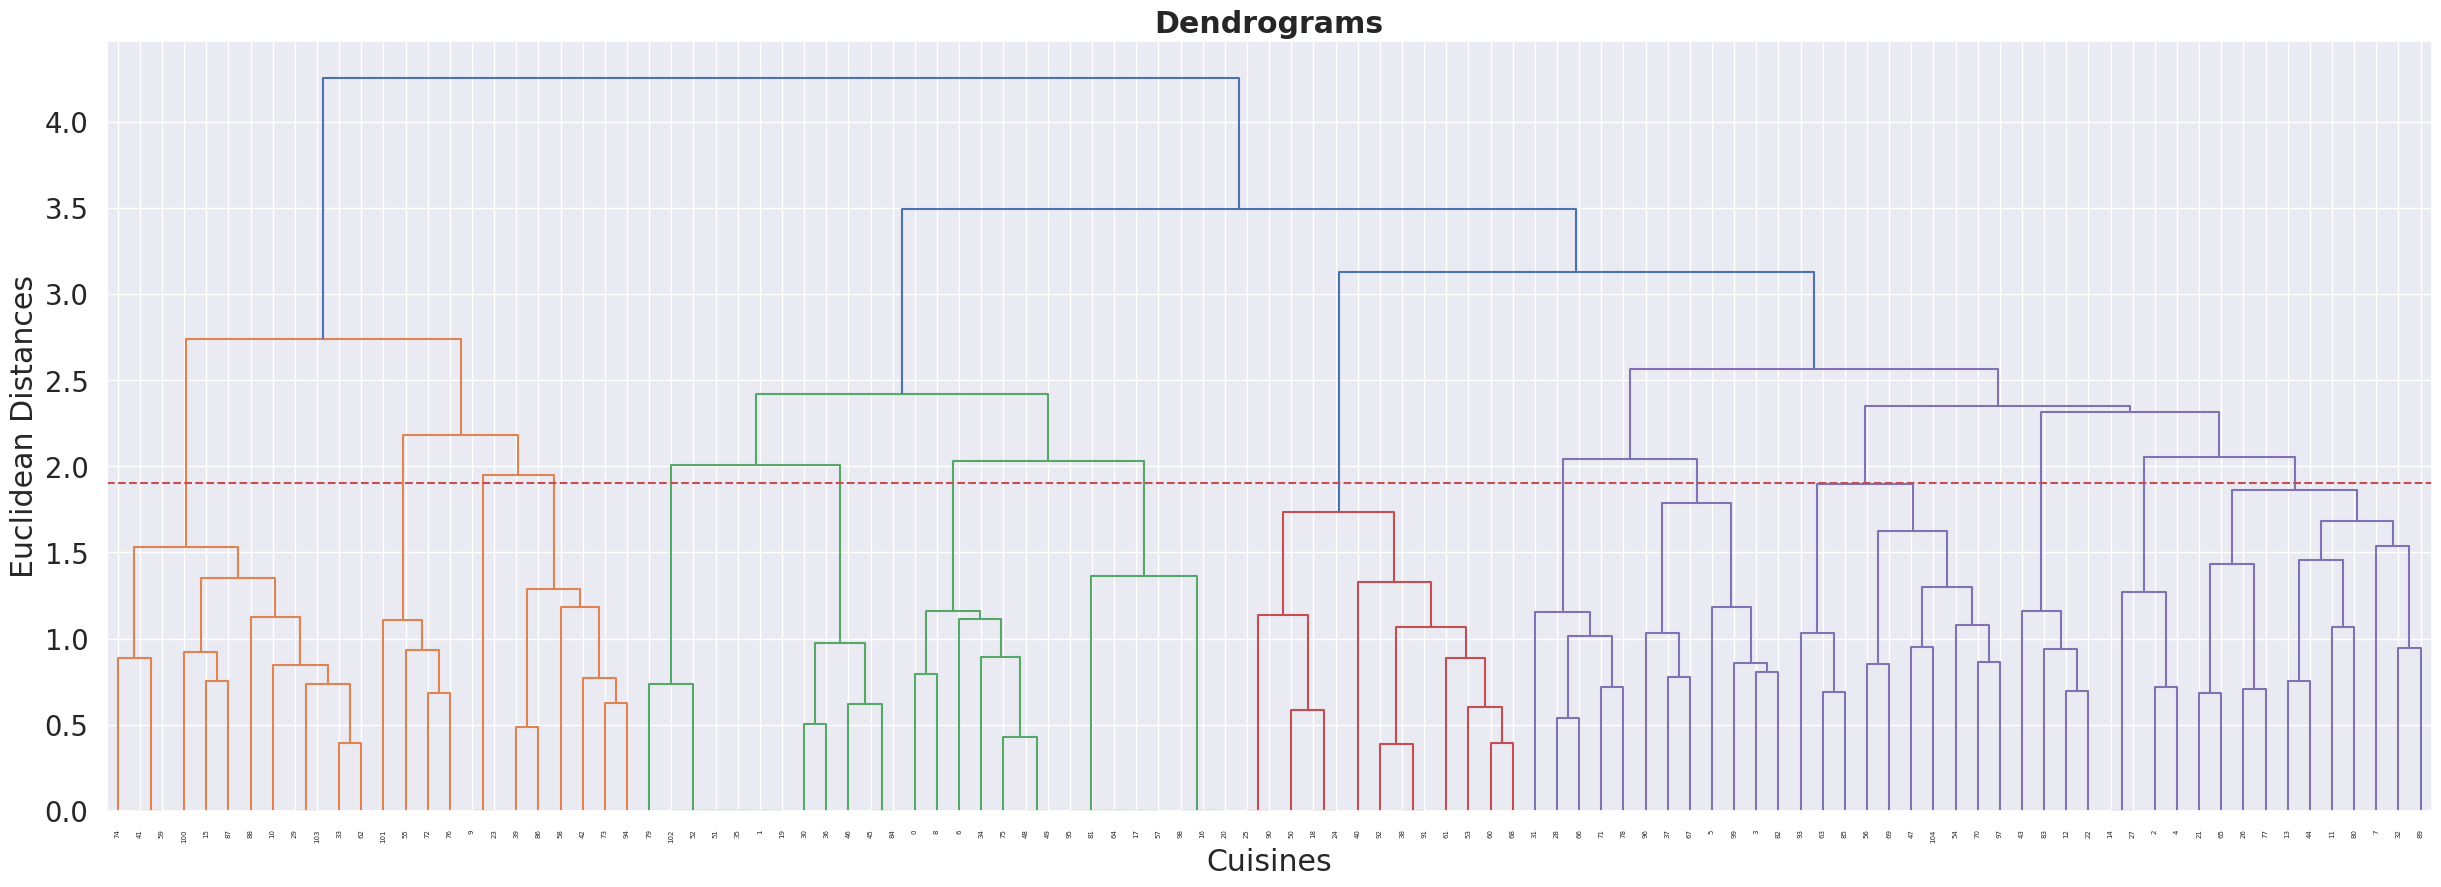

In [111]:
# Hierarchical Clustering for 'Cuisine' feature
plt.figure(figsize=(30,10))
sns.set(font_scale = 1.8)
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrograms',fontweight = 'bold')
plt.xlabel('Cuisines')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1.9, color='r', linestyle='--')
plt.show()

In [112]:
# To choose appropriate K value

for k in range(2,20):
  aggh = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
  aggh.fit(X)
  y_hc=aggh.fit_predict(X)
  print("For n_clusters =", k, "The average silhouette_score is :", round(silhouette_score(X, y_hc),5))

For n_clusters = 2 The average silhouette_score is : 0.12804
For n_clusters = 3 The average silhouette_score is : 0.09739
For n_clusters = 4 The average silhouette_score is : 0.11346
For n_clusters = 5 The average silhouette_score is : 0.11842
For n_clusters = 6 The average silhouette_score is : 0.13024
For n_clusters = 7 The average silhouette_score is : 0.12976
For n_clusters = 8 The average silhouette_score is : 0.14157
For n_clusters = 9 The average silhouette_score is : 0.15299
For n_clusters = 10 The average silhouette_score is : 0.16063
For n_clusters = 11 The average silhouette_score is : 0.17224
For n_clusters = 12 The average silhouette_score is : 0.18377
For n_clusters = 13 The average silhouette_score is : 0.19322
For n_clusters = 14 The average silhouette_score is : 0.22068
For n_clusters = 15 The average silhouette_score is : 0.23861
For n_clusters = 16 The average silhouette_score is : 0.24379
For n_clusters = 17 The average silhouette_score is : 0.25136
For n_clusters =

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [113]:
# Creating an object for AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')

In [114]:
# Fitting the model
aggh.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=15)

In [115]:
# Label Prediction
y_hc=aggh.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [116]:
# Labels
print(y_hc)

[12 13 10  6 10  6 12  2 12 14  4  2  8  2 10  4  5  5  1 13  5  2  8 14
  1  1  2 10 11  4  7 11  2  4 12 13  7  6  1  3  1  4  3  8  2  7  7  0
 12 12  1 13 13  1  0  9  0  5  3  4  1  1  4  0  5  2 11  6  1  0  0 11
  9  3  4 12  9  2 11 13  2  5  6  8  7  0  3  4  4  2  1  1  1  0  3  5
  6  0  5  6  4  9 13  4  0]


In [117]:
# Creating new feature to store labels
df_name['Agglomerative_labels'] = aggh.labels_

In [118]:
# Creating a DataFrame for KMeans Labels visualization
Agglomerative_labels_count = pd.DataFrame(df_name.groupby(['Agglomerative_labels'])['Cuisines'].count()).reset_index()

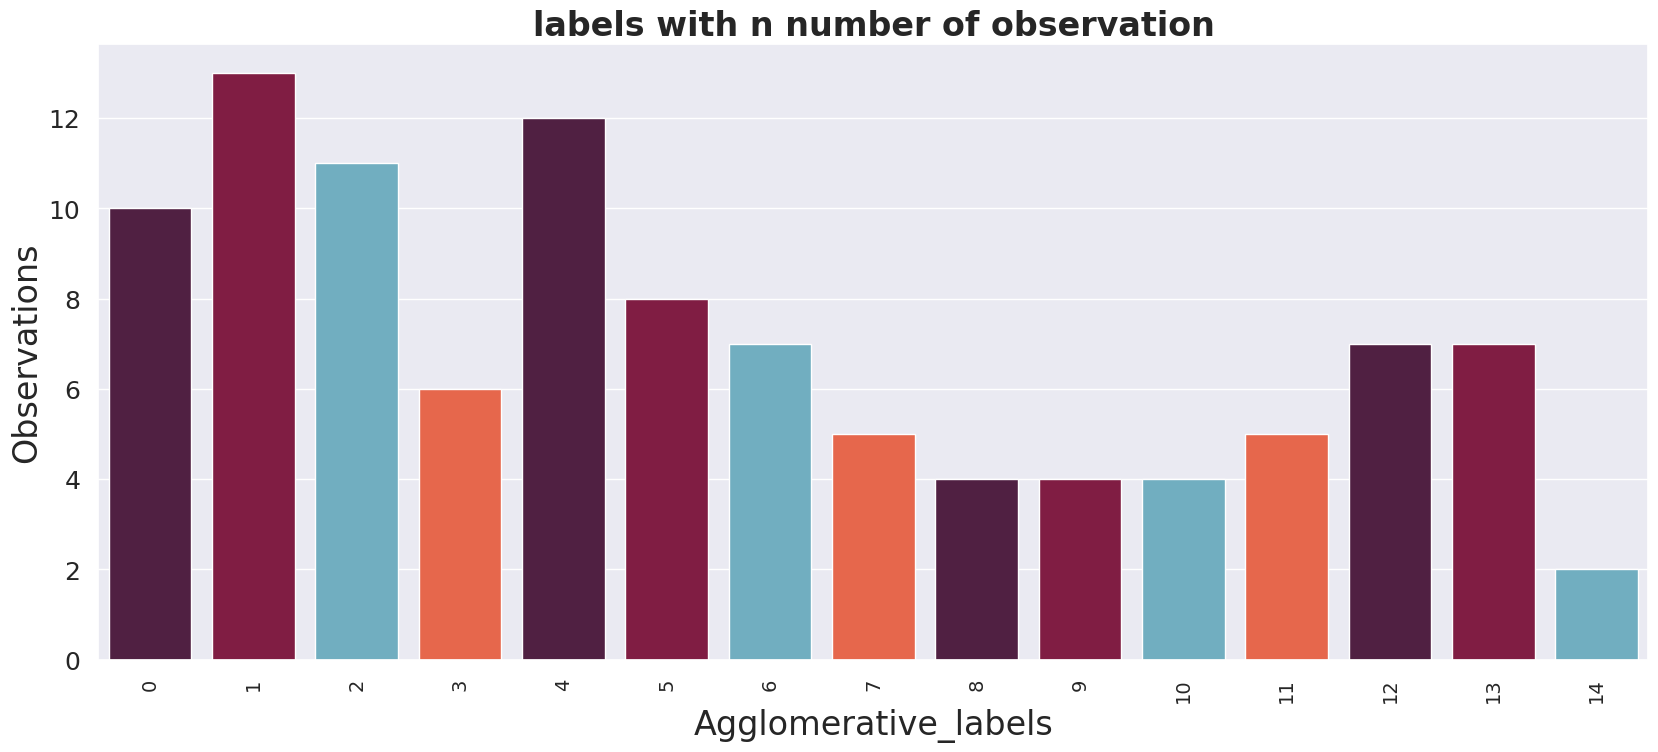

In [119]:
# Visualization of Labels with n number of observations
labelsnobs(Agglomerative_labels_count,Agglomerative_labels_count['Agglomerative_labels'],Agglomerative_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [120]:
# Grouping 'Kmeans_labels' and 'Name' feature
Agglomerative_labels_name = pd.DataFrame(df_name.groupby(['Agglomerative_labels'])['Name'],columns = ['Agglomerative_labels','Restaurants'])
Agglomerative_labels_name.set_index('Agglomerative_labels', inplace=True)

In [121]:
df_name.head(1)

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels,Agglomerative_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun,10,12


In [122]:
# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Agglomerative_labels_name['Restaurants'][i])

Cluster:0
47                            Shanghai Chef 2
54                             Asian Meal Box
56           Feast - Sheraton Hyderabad Hotel
63                               Dine O China
69                             The Indi Grill
70                 Urban Asia - Kitchen & Bar
85                              Momos Delight
93                   Zing's Northeast Kitchen
97            Zega - Sheraton Hyderabad Hotel
104    Republic Of Noodles - Lemon Tree Hotel
Name: Name, dtype: object
Cluster:1
18                          10 Downing Street
24                                      SKYHY
25                                 Tiki Shack
38                            The Glass Onion
40                                Frio Bistro
50                              Gal Punjab Di
53                            Diners Pavilion
60                                 PourHouse7
61                       Prism Club & Kitchen
68                      The Tilt Bar Republic
90                               A

In [123]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Kmeans_labels',
       'Agglomerative_labels'],
      dtype='object')

In [124]:
#dataframe for creating scatter plot of all cluster of Agglomerative cluster
df_agg = df_name
df_agg = df_agg.assign(Cuisines=df_agg['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_agg.columns, axis=1)

In [126]:
#plotting
import plotly.express as px
fig = px.scatter(df_agg, x="Cuisines", y="Name", color="Agglomerative_labels", size='Cost', width=1500, height=800)
fig.show()

##**Loading Zomato Restaurant Reviews CSV file**

In [129]:
data2 = pd.read_csv('/content/drive/MyDrive/Capstone project-04/Zomato Restaurant reviews.csv')

In [130]:
df_review=data2.copy()

In [131]:
#Shape
df_review.shape

(10000, 7)

In [132]:
#Checking first 5 rows of the dataset
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
